<a href="https://colab.research.google.com/github/Tefong35/TefongEugene/blob/main/Kopie_von_Edmond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [ ]:
drive.flush_and_unmount()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns
import random
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import stats



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

df = pd.read_excel("/content/drive/MyDrive/Modellierungs_Aufgabe_Edmond.xlsx")
df.head()

,Von,Bis,Außentemperatur (°C),Anzahl Kühlstellen (1/0),Mittelwert Innenraum-Temperatur (°C),Elektrische Leistung Verdichter (kW),Strompreis (€/MWh),Wareneingang Werk (n/d),Warenausgang Gesamt (n/d),Wareneingang Gesamt (n/d)
0,2023-06-01 00:00:00,2023-06-01 00:15:00,16.900000,6.0,-22.753344,543.009351,84.15,1107,1779,1855
1,2023-06-01 00:15:00,2023-06-01 00:30:00,16.033333,6.0,-22.763201,543.988286,84.15,1107,1779,1855
2,2023-06-01 00:30:00,2023-06-01 00:45:00,14.350000,7.4,-22.780362,577.442227,84.15,1107,1779,1855
3,2023-06-01 00:45:00,2023-06-01 01:00:00,14.316667,7.0,-22.805374,588.167905,84.15,1107,1779,1855
4,2023-06-01 01:00:00,2023-06-01 01:15:00,14.016667,7.0,-22.827198,589.529904,74.30,1107,1779,1855


In [ ]:
df.shape

(14692, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14692 entries, 0 to 14691
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Von                                   14692 non-null  datetime64[ns]
 1   Bis                                   14692 non-null  datetime64[ns]
 2   Außentemperatur (°C)                  14692 non-null  float64       
 3   Anzahl Kühlstellen (1/0)              14503 non-null  float64       
 4   Mittelwert Innenraum-Temperatur (°C)  14503 non-null  float64       
 5   Elektrische Leistung Verdichter (kW)  14503 non-null  float64       
 6   Strompreis (€/MWh)                    14692 non-null  float64       
 7   Wareneingang Werk (n/d)               14692 non-null  int64         
 8   Warenausgang Gesamt (n/d)             14692 non-null  int64         
 9   Wareneingang Gesamt (n/d)             14692 non-null  int64         
dty

In [ ]:
# La fonction duplicated

print(df.duplicated(), end='\n\n')

longueur_initiale = len(df)

nb_lignes_dupliquees = df.duplicated().sum()

print("Anzahl doppelter Zeilen:", nb_lignes_dupliquees)

nb_lignes_dupliquees = df.duplicated().sum()

# La fonction drop_duplicates

df.drop_duplicates(inplace=True)

longueur_finale = len(df)

print("Anzahl der gelöschten Zeilen:", longueur_initiale-longueur_finale)

0        False
1        False
2        False
3        False
4        False
         ...  
14687    False
14688    False
14689    False
14690    False
14691    False
Length: 14692, dtype: bool

Anzahl doppelter Zeilen: 0
Anzahl der gelöschten Zeilen: 0


In [ ]:
# Analyser les cas de données manquantes dans le DataFrame
# Analys der Fehlenden Werte in dem Datensatz
df.isna().sum(axis = 0)*100/len(df)

Von                                     0.000000
Bis                                     0.000000
Außentemperatur (°C)                    0.000000
Anzahl Kühlstellen (1/0)                1.286414
Mittelwert Innenraum-Temperatur (°C)    1.286414
Elektrische Leistung Verdichter (kW)    1.286414
Strompreis (€/MWh)                      0.000000
Wareneingang Werk (n/d)                 0.000000
Warenausgang Gesamt (n/d)               0.000000
Wareneingang Gesamt (n/d)               0.000000
dtype: float64

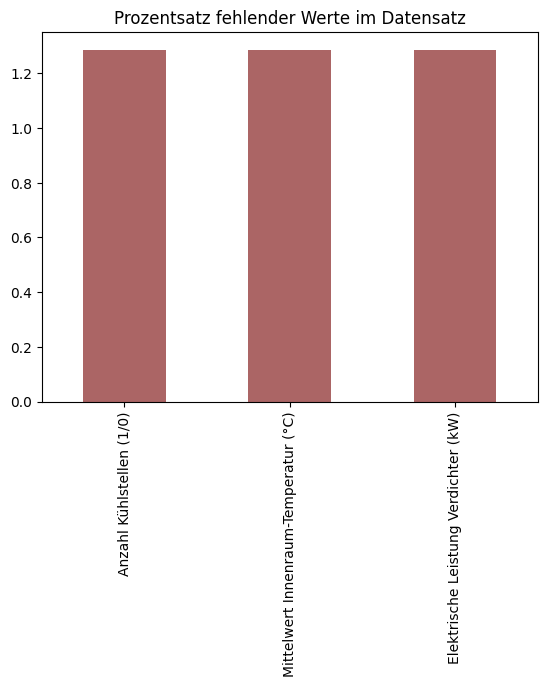

In [ ]:
#calcul du poucentage des valeures maquantes.
per_missing_values =(df.isna().sum()) / (len(df))*100
#lets emove the columns that has 0% (we don't need them in our bar chart)
per_missing_values = per_missing_values[per_missing_values > 0 ]
#sort the dataframe
per_missing_values = per_missing_values.sort_values(ascending=False)
per_missing_values.plot(kind='bar',title='Prozentsatz fehlender Werte im Datensatz',color='#ab6565');

In [ ]:
# Hier werden die Namen der Variablen gezeigt
df.columns

Index(['Von', 'Bis', 'Außentemperatur (°C)', 'Anzahl Kühlstellen (1/0)',
       'Mittelwert Innenraum-Temperatur (°C)',
       'Elektrische Leistung Verdichter (kW)', 'Strompreis (€/MWh)',
       'Wareneingang Werk (n/d)', 'Warenausgang Gesamt (n/d)',
       'Wareneingang Gesamt (n/d)'],
      dtype='object')

In [ ]:
#Fehlende Werte durch Modalwert ersetzen
#NA_Variable = ['Außentemperatur (°C)', 'Anzahl Kühlstellen (1/0)',
#       'Mittelwert Innenraum-Temperatur (°C)']
df['Anzahl Kühlstellen (1/0)'] = df['Anzahl Kühlstellen (1/0)'].fillna(df['Anzahl Kühlstellen (1/0)'].mode()[0])
df['Mittelwert Innenraum-Temperatur (°C)'] = df['Mittelwert Innenraum-Temperatur (°C)'].fillna(df['Mittelwert Innenraum-Temperatur (°C)'].mode()[0])
df['Elektrische Leistung Verdichter (kW)'] = df['Elektrische Leistung Verdichter (kW)'].fillna(df['Elektrische Leistung Verdichter (kW)'].mode()[0])


In [ ]:
# Hier wird überprüft, ob fehlende Werte noch vorhanden sind.
df.isna().sum(axis = 0)*100/len(df)

Von                                     0.0
Bis                                     0.0
Außentemperatur (°C)                    0.0
Anzahl Kühlstellen (1/0)                0.0
Mittelwert Innenraum-Temperatur (°C)    0.0
Elektrische Leistung Verdichter (kW)    0.0
Strompreis (€/MWh)                      0.0
Wareneingang Werk (n/d)                 0.0
Warenausgang Gesamt (n/d)               0.0
Wareneingang Gesamt (n/d)               0.0
dtype: float64

In [ ]:
# Hier wird die Variable "Von" als Datum ersetz
df["Datum"] = pd.to_datetime(df["Von"], unit="ms")
#df["Jahr"] = df["Datum"].dt.year
#df["Monat"] = df["Datum"].dt.month
#df["Tag"] = df["Datum"].dt.day
#df["Uhr"] = df["Datum"].dt.hour
df.head()

,Von,Bis,Außentemperatur (°C),Anzahl Kühlstellen (1/0),Mittelwert Innenraum-Temperatur (°C),Elektrische Leistung Verdichter (kW),Strompreis (€/MWh),Wareneingang Werk (n/d),Warenausgang Gesamt (n/d),Wareneingang Gesamt (n/d),Datum
0,2023-06-01 00:00:00,2023-06-01 00:15:00,16.900000,6.0,-22.753344,543.009351,84.15,1107,1779,1855,2023-06-01 00:00:00
1,2023-06-01 00:15:00,2023-06-01 00:30:00,16.033333,6.0,-22.763201,543.988286,84.15,1107,1779,1855,2023-06-01 00:15:00
2,2023-06-01 00:30:00,2023-06-01 00:45:00,14.350000,7.4,-22.780362,577.442227,84.15,1107,1779,1855,2023-06-01 00:30:00
3,2023-06-01 00:45:00,2023-06-01 01:00:00,14.316667,7.0,-22.805374,588.167905,84.15,1107,1779,1855,2023-06-01 00:45:00
4,2023-06-01 01:00:00,2023-06-01 01:15:00,14.016667,7.0,-22.827198,589.529904,74.30,1107,1779,1855,2023-06-01 01:00:00


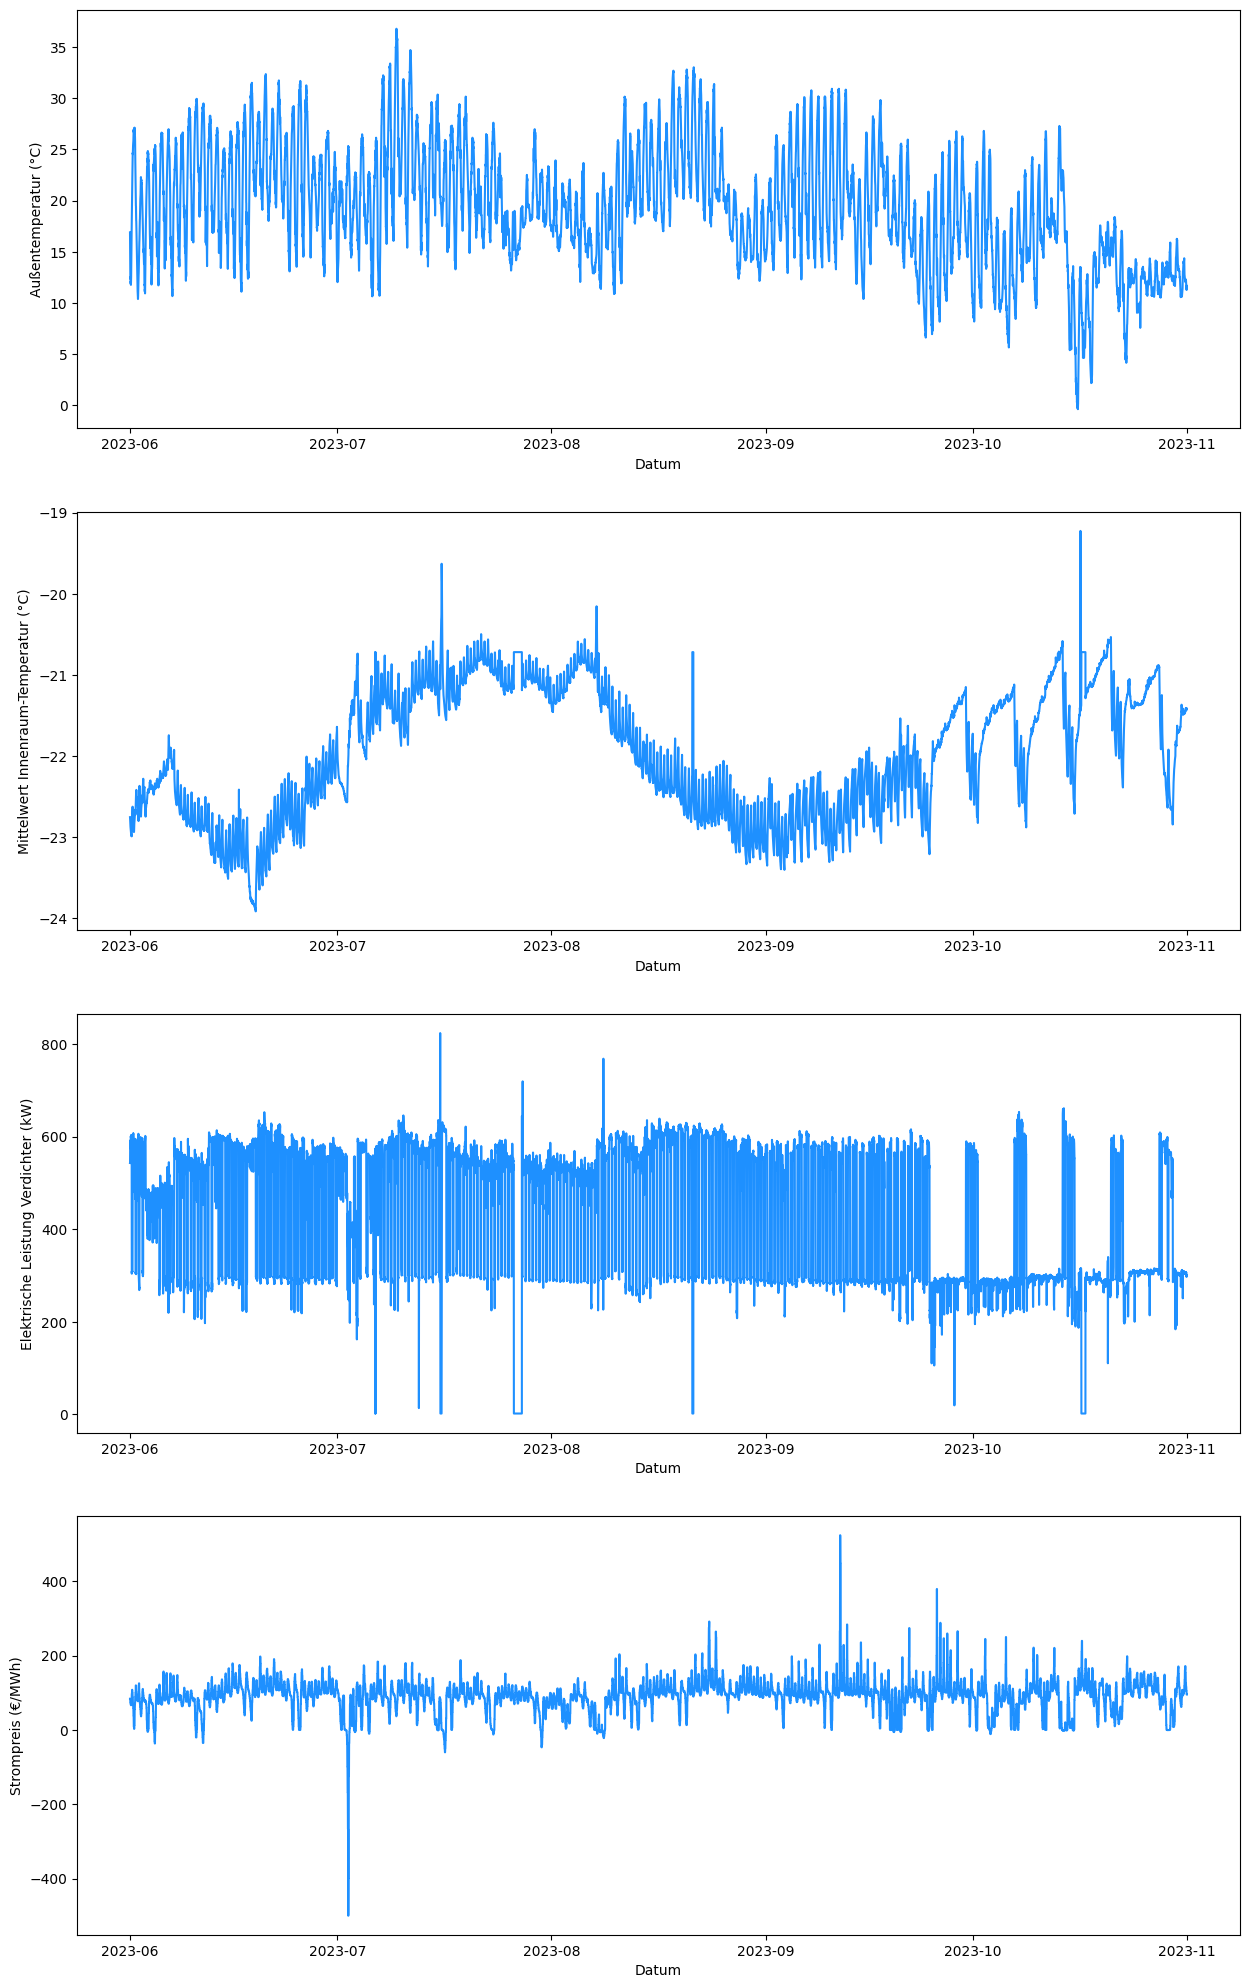

In [ ]:
# Verlauf der Variablen Außentemperatur, Mittelwert Innenraum-Temperatur, Elektrische Leistung Verdichter und Strompreis
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
sns.lineplot(x=df.Datum, y=df['Außentemperatur (°C)'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df.Datum, y=df['Mittelwert Innenraum-Temperatur (°C)'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df.Datum, y=df['Elektrische Leistung Verdichter (kW)'], ax=ax[2], color='dodgerblue')
sns.lineplot(x=df.Datum, y=df['Strompreis (€/MWh)'], ax=ax[3], color='dodgerblue')
plt.show()

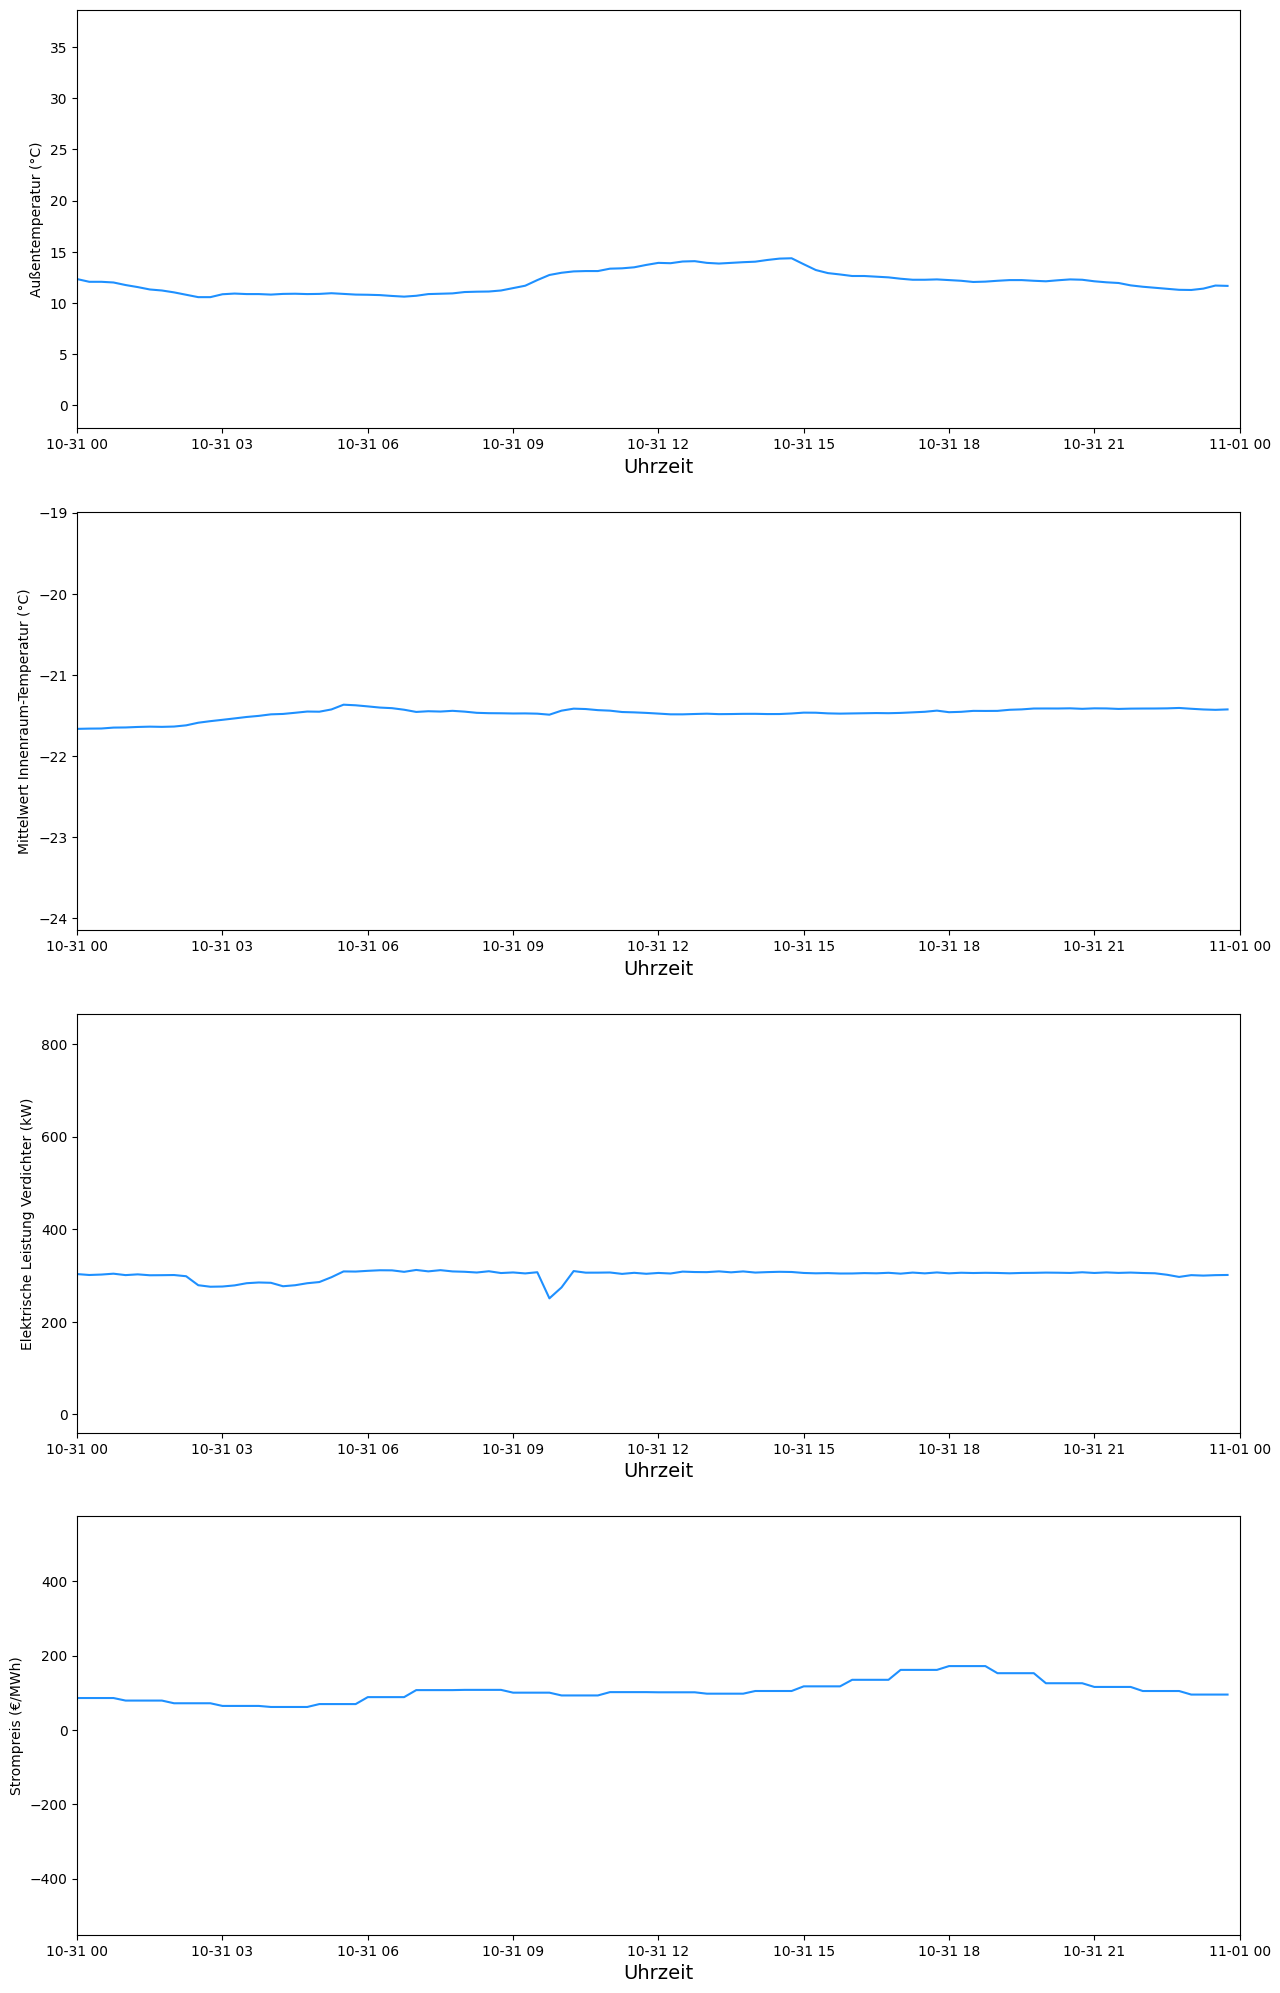

In [ ]:
# Hier wird der Verlauf nur 24 Stunden (31.10.2023) gezeigt
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
sns.lineplot(x=df.Datum, y=df['Außentemperatur (°C)'], ax=ax[0], color='dodgerblue')
ax[0].set_xlabel(xlabel='Uhrzeit', fontsize=14)
sns.lineplot(x=df.Datum, y=df['Mittelwert Innenraum-Temperatur (°C)'], ax=ax[1], color='dodgerblue')
ax[1].set_xlabel(xlabel='Uhrzeit', fontsize=14)
sns.lineplot(x=df.Datum, y=df['Elektrische Leistung Verdichter (kW)'], ax=ax[2], color='dodgerblue')
ax[2].set_xlabel(xlabel='Uhrzeit', fontsize=14)
sns.lineplot(x=df.Datum, y=df['Strompreis (€/MWh)'], ax=ax[3], color='dodgerblue')
ax[3].set_xlabel(xlabel='Uhrzeit', fontsize=14)
for i in range(4):
    ax[i].set_xlim([date(2023, 10, 31), date(2023, 11, 1)])
plt.show()

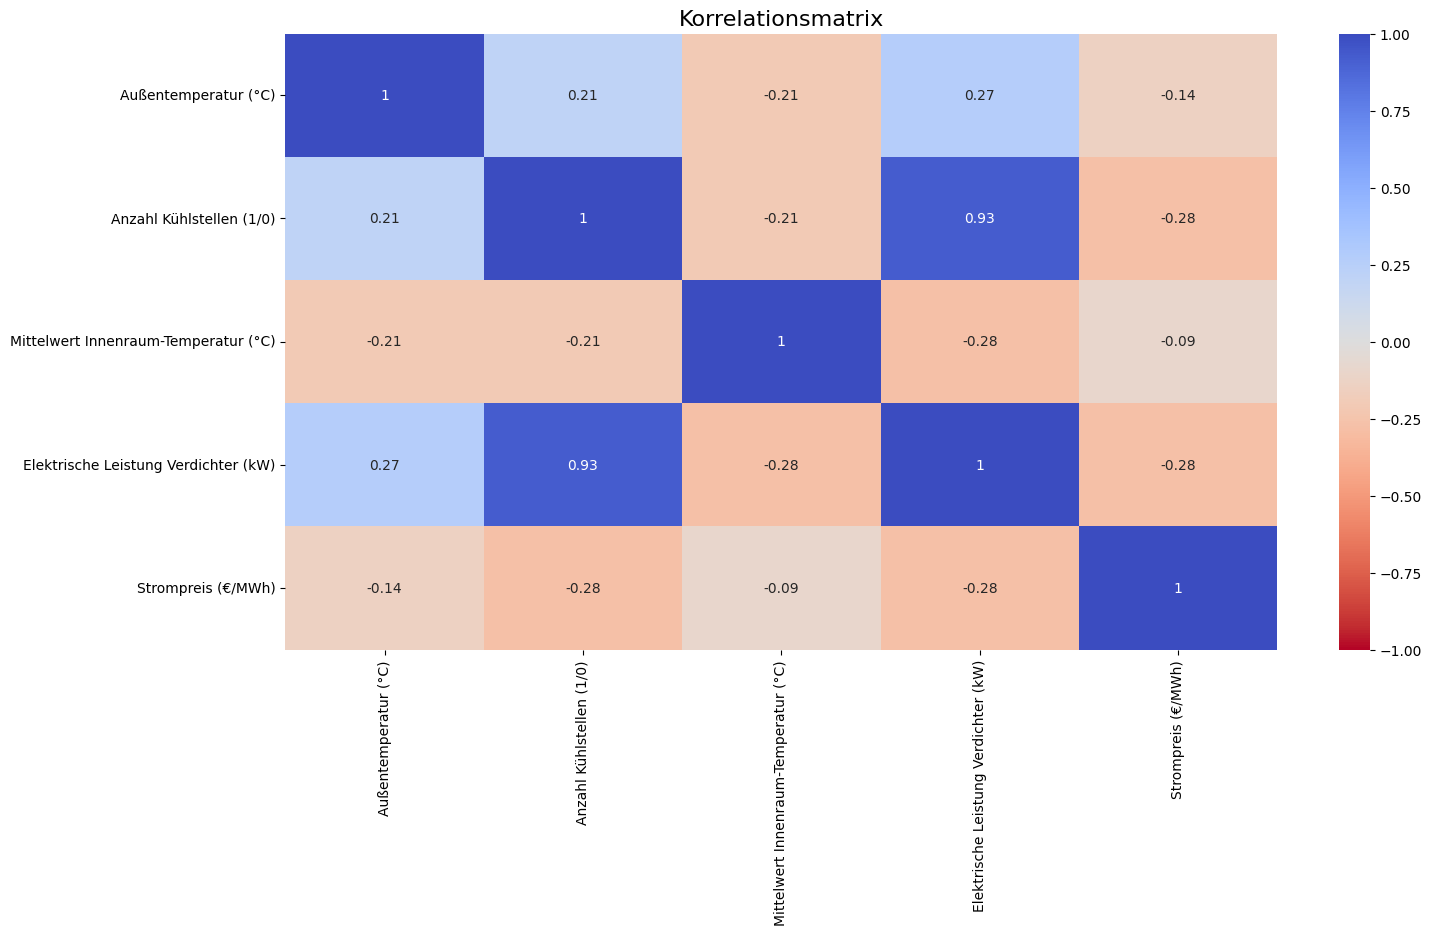

In [ ]:
#Corelation

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

original_cols = ['Außentemperatur (°C)',
                 'Anzahl Kühlstellen (1/0)',
                 'Mittelwert Innenraum-Temperatur (°C)', 'Elektrische Leistung Verdichter (kW)', 'Strompreis (€/MWh)', ]

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
ax.set_title('Korrelationsmatrix', fontsize=16)
plt.show()

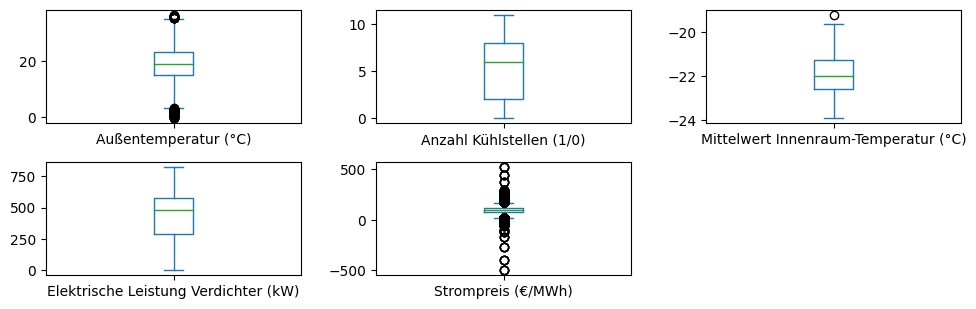

In [ ]:
# Boxplot
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

raw_plot = pd.DataFrame(df[original_cols])
raw_plot.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()




Modellierung

In [ ]:
# Temperaturprognose 24h
#filtered_df = df.loc[(df['date'] >= '2020-09-01')
#                    & (df['date'] < '2020-09-15')]
Data_24H = df.loc[df["Datum"] >= "2023-10-31"]
Data_24H.head()

,Von,Bis,Außentemperatur (°C),Anzahl Kühlstellen (1/0),Mittelwert Innenraum-Temperatur (°C),Elektrische Leistung Verdichter (kW),Strompreis (€/MWh),Wareneingang Werk (n/d),Warenausgang Gesamt (n/d),Wareneingang Gesamt (n/d),Datum
14596,2023-10-31 00:00:00,2023-10-31 00:15:00,12.333333,4.0,-21.664792,303.085874,86.05,707,589,827,2023-10-31 00:00:00
14597,2023-10-31 00:15:00,2023-10-31 00:30:00,12.066667,4.0,-21.661594,301.128019,86.05,707,589,827,2023-10-31 00:15:00
14598,2023-10-31 00:30:00,2023-10-31 00:45:00,12.066667,4.0,-21.660354,302.064374,86.05,707,589,827,2023-10-31 00:30:00
14599,2023-10-31 00:45:00,2023-10-31 01:00:00,12.000000,4.0,-21.649074,303.937116,86.05,707,589,827,2023-10-31 00:45:00
14600,2023-10-31 01:00:00,2023-10-31 01:15:00,11.750000,4.0,-21.647387,300.872633,79.20,707,589,827,2023-10-31 01:00:00


In [ ]:
Variable_Todrop = ["Von", "Bis", 'Wareneingang Werk (n/d)', 'Warenausgang Gesamt (n/d)',
       'Wareneingang Gesamt (n/d)', 'Datum']
Data_24H = Data_24H.drop(Variable_Todrop, axis=1)

In [ ]:
Data_24H.head()

,Außentemperatur (°C),Anzahl Kühlstellen (1/0),Mittelwert Innenraum-Temperatur (°C),Elektrische Leistung Verdichter (kW),Strompreis (€/MWh)
14596,12.333333,4.0,-21.664792,303.085874,86.05
14597,12.066667,4.0,-21.661594,301.128019,86.05
14598,12.066667,4.0,-21.660354,302.064374,86.05
14599,12.000000,4.0,-21.649074,303.937116,86.05
14600,11.750000,4.0,-21.647387,300.872633,79.20


In [ ]:
# Die Anzahl der Kühlstellen, die regelmäßig vorkommen. Damit wird die Variable 'Anzahl Kühlstellen (1/0)' festgelegt.
df['Anzahl Kühlstellen (1/0)'].value_counts()

2.000000    5274
8.000000    4566
7.000000    1710
4.000000    1081
6.000000     583
            ... 
2.866667       1
0.666667       1
9.866667       1
9.133333       1
3.266667       1
Name: Anzahl Kühlstellen (1/0), Length: 116, dtype: int64

In [ ]:
# Hier werden die Anzahl der Kühlstellen festgelegt.
random.seed(1)
#number = [randint(2, 8) for _ in range(96)] # Stores the random number between 1 and 100 in the variable 'number'.
#print(number)
#df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
#Data_24H["AK"] = pd.DataFrame(np.random.randint(2,8,size=96), columns="AK")
#AK = pd.DataFrame(np.random.randint(2,8,size=96), columns=list("A"))
AK = np.random.randint(2,8,size=96)
Data_24H["Anzahl Kühlstellen"] = AK
Data_24H.head()


,Außentemperatur (°C),Anzahl Kühlstellen (1/0),Mittelwert Innenraum-Temperatur (°C),Elektrische Leistung Verdichter (kW),Strompreis (€/MWh),Anzahl Kühlstellen
14596,12.333333,4.0,-21.664792,303.085874,86.05,7
14597,12.066667,4.0,-21.661594,301.128019,86.05,4
14598,12.066667,4.0,-21.660354,302.064374,86.05,5
14599,12.000000,4.0,-21.649074,303.937116,86.05,6
14600,11.750000,4.0,-21.647387,300.872633,79.20,6


In [ ]:
Data_24H.columns

Index(['Außentemperatur (°C)', 'Anzahl Kühlstellen (1/0)',
       'Mittelwert Innenraum-Temperatur (°C)',
       'Elektrische Leistung Verdichter (kW)', 'Strompreis (€/MWh)', 'AK',
       'Anzahl Kühlstellen'],
      dtype='object')

In [ ]:
# Temperaturprognose 24h
Einflussvariablen = ['Außentemperatur (°C)','Anzahl Kühlstellen']
X = Data_24H[Einflussvariablen]
Y = Data_24H['Mittelwert Innenraum-Temperatur (°C)']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Zentrieren und reduzieren Sie Ihre Daten : Ziel ...
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#model.fit(X_train, y_train)
print('Coefficient de détermination du modèle :', model.score(X_train_scaled, y_train))
#print('Coefficient de détermination obtenu par Cv :', cross_val_score(model,X_train_scaled,y_train).mean())


Coefficient de détermination du modèle : 0.012472771541531813


In [ ]:
# Leistung des Modells
print(model.score(X_train_scaled, y_train))
print(model.score(X_test, y_test))

0.012472771541531813
-0.26858937204881683


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_scaled) #Ordinary least squares
est2 = est.fit()
print(est2.summary())

                                          OLS Regression Results                                         
Dep. Variable:     Mittelwert Innenraum-Temperatur (°C)   R-squared (uncentered):                   0.000
Model:                                              OLS   Adj. R-squared (uncentered):             -0.031
Method:                                   Least Squares   F-statistic:                          3.929e-06
Date:                                  Tue, 27 Feb 2024   Prob (F-statistic):                        1.00
Time:                                          12:51:43   Log-Likelihood:                         -300.54
No. Observations:                                    67   AIC:                                      605.1
Df Residuals:                                        65   BIC:                                      609.5
Df Model:                                             2                                                  
Covariance Type:                              

In [ ]:
Einflussvariablen = ['Außentemperatur (°C)','Anzahl Kühlstellen']
X = Data_24H[Einflussvariablen]
Y = Data_24H['Elektrische Leistung Verdichter (kW)']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
#model.fit(X_train, y_train)
print('Coefficient de détermination du modèle :', model.score(X_train_scaled, y_train))



Coefficient de détermination du modèle : 0.16703431230824362


In [ ]:
# Leistung des Modells
print(model.score(X_train_scaled, y_train))
print(model.score(X_test, y_test))

0.16703431230824362
-7.0679716812361235


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_scaled) #Ordinary least squares
est2 = est.fit()
print(est2.summary())

                                          OLS Regression Results                                         
Dep. Variable:     Elektrische Leistung Verdichter (kW)   R-squared (uncentered):                   0.000
Model:                                              OLS   Adj. R-squared (uncentered):             -0.031
Method:                                   Least Squares   F-statistic:                           0.003177
Date:                                  Tue, 27 Feb 2024   Prob (F-statistic):                       0.997
Time:                                          13:32:51   Log-Likelihood:                         -477.97
No. Observations:                                    67   AIC:                                      959.9
Df Residuals:                                        65   BIC:                                      964.3
Df Model:                                             2                                                  
Covariance Type:                              

Optimierungsverfahren mit Pyomo

In [ ]:
#from pyomo.environ import *
#import pyomo.environ as pe
#from pyomo.opt import SolverFactory
#import pickle
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pyomo.environ as pe
from pyomo.opt import SolverFactory
import pickle
from pandas import set_option
from pickle import dump

In [ ]:
# Define features and label
X = Data_24H.drop(columns=['Anzahl Kühlstellen (1/0)', 'Strompreis (€/MWh)'], axis = 1)
# Rename columns to remove whitespace
X = X.rename(columns=lambda X: X.strip().replace(' ', '_'))
y = Data_24H['Strompreis (€/MWh)']
print(X.shape, y.shape)
X.head(5)

(96, 4) (96,)


,Außentemperatur_(°C),Mittelwert_Innenraum-Temperatur_(°C),Elektrische_Leistung_Verdichter_(kW),Anzahl_Kühlstellen
14596,12.333333,-21.664792,303.085874,7
14597,12.066667,-21.661594,301.128019,4
14598,12.066667,-21.660354,302.064374,5
14599,12.000000,-21.649074,303.937116,6
14600,11.750000,-21.647387,300.872633,6


In [ ]:
# a) Descriptive statistics
set_option("display.precision", 3)
print(Data_24H.describe())

       Außentemperatur (°C)  Anzahl Kühlstellen (1/0)  \
count                96.000                    96.000   
mean                 12.077                     3.744   
std                   1.092                     0.662   
min                  10.567                     2.000   
25%                  11.058                     4.000   
50%                  12.067                     4.000   
75%                  12.746                     4.000   
max                  14.367                     4.000   

       Mittelwert Innenraum-Temperatur (°C)  \
count                                96.000   
mean                                -21.474   
std                                   0.069   
min                                 -21.665   
25%                                 -21.482   
50%                                 -21.463   
75%                                 -21.425   
max                                 -21.367   

       Elektrische Leistung Verdichter (kW)  Strompreis (€/MWh

<ipython-input-20-8f99560db28f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data_24H[feature], ax=axes[i], color='steelblue', shade=True)
<ipython-input-20-8f99560db28f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data_24H[feature], ax=axes[i], color='steelblue', shade=True)
<ipython-input-20-8f99560db28f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data_24H[feature], ax=axes[i], color='steelblue', shade=True)
<ipython-input-20-8f99560db28f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kd

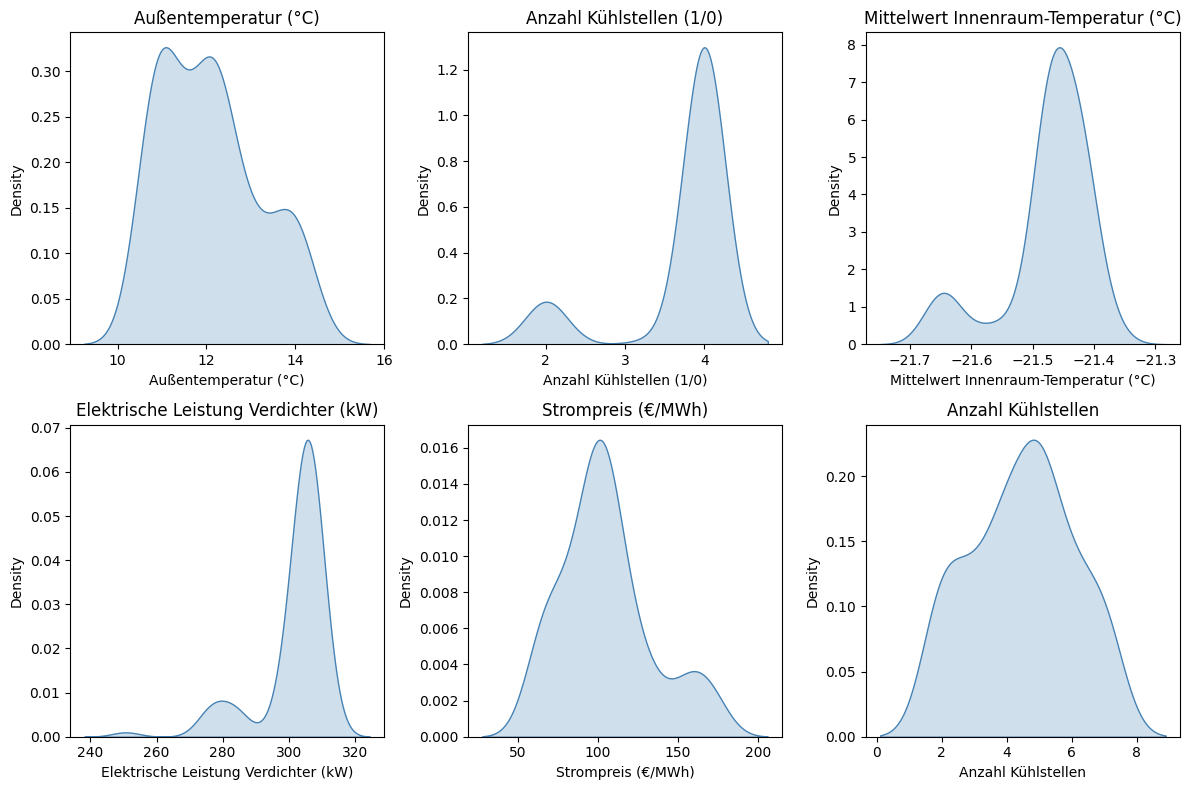

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array to simplify plotting
axes = axes.flatten()

# Loop through each feature and create a density plot
for i, feature in enumerate(Data_24H.columns):
    sns.kdeplot(Data_24H[feature], ax=axes[i], color='steelblue', shade=True)
    axes[i].set_title(feature)

# Adjust the layout and spacing of the subplots
fig.tight_layout()

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train)
#model.fit(X_train, y_train)
print('Coefficient de détermination du modèle :', model_LR.score(X_train_scaled, y_train))

Coefficient de détermination du modèle : 0.3394207937076945


In [ ]:
# Leistung des Modells
print(model_LR.score(X_train_scaled, y_train))
print(model_LR.score(X_test, y_test))

0.3154191299672495
-9081.30995022356


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# b) Save model for later use
# save the model to disk
filename = 'finalized_model_multivariate.sav'
dump(model_LR, open(filename, 'wb'))

In [ ]:
# Load the fitted Linear Regression model from disk
with open('finalized_model_multivariate.sav', 'rb') as file:
    model_LR = pickle.load(file)

In [ ]:
# Create the model
from pyomo.environ import *
model = ConcreteModel()

# Define variables
m = len(X.columns)
model.x = Var(range(m), within=NonNegativeReals)
x = model.x

In [ ]:
# Define constraints
for i in range(m):
    model.x[i].setub(X.iloc[:,i].max())
    model.x[i].setlb(X.iloc[:,i].min())

model.C1 = ConstraintList()
model.C1.add(X.iloc[:,0].min()<= x[0]<=X.iloc[:,0].max())

model.C2 = ConstraintList()
model.C2.add(inequality(X.iloc[:,1].min(), x[1], X.iloc[:,1].max()))

model.C3 = ConstraintList()
model.C3.add(inequality(X.iloc[:,2].min(), x[2], X.iloc[:,2].max()))

model.C4 = ConstraintList()
model.C4.add(inequality(X.iloc[:,3].min(), x[3], X.iloc[:,3].max()))

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


PyomoException: Cannot convert non-constant Pyomo expression (10.5666666666667  <=  x[0]) to bool.
This error is usually caused by using a Var, unit, or mutable Param in a
Boolean context such as an "if" statement, or when checking container
membership or equality. For example,
    >>> m.x = Var()
    >>> if m.x >= 1:
    ...     pass
and
    >>> m.y = Var()
    >>> if m.y in [m.x, m.y]:
    ...     pass
would both cause this exception.

In [ ]:
x[0]

In [ ]:
Data_24H.columns

Index(['Außentemperatur (°C)', 'Anzahl Kühlstellen (1/0)',
       'Mittelwert Innenraum-Temperatur (°C)',
       'Elektrische Leistung Verdichter (kW)', 'Strompreis (€/MWh)',
       'Anzahl Kühlstellen'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Modellierungs_Aufgabe_Edmond.csv", sep=';', encoding='ascii') #encoding='ISO-8859-1'
df.head()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xee in position 15: ordinal not in range(128)

# Neuer Abschnitt

In [ ]:
9#df=pd.read_csv('001_df_processed.csv', low_memory=False)
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Projet_DataScientest/000_df_RAW.csv", low_memory=False, na_values=["-1"])
df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,...,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,200500000001,1.0,1,4.0,1.0,1.0,11.0,0.0,0,0.0,...,0.0,1.0,1.0,0,63,1.0,0.0,1.0,0.0,NaN
1,200500000001,1.0,1,3.0,2.0,3.0,11.0,0.0,0,0.0,...,0.0,1.0,1.0,0,63,1.0,0.0,1.0,0.0,NaN
2,200500000001,2.0,2,1.0,1.0,0.0,11.0,0.0,0,0.0,...,0.0,1.0,1.0,0,63,1.0,0.0,1.0,0.0,NaN
3,200500000001,4.0,2,1.0,1.0,0.0,31.0,0.0,0,0.0,...,0.0,1.0,1.0,0,63,1.0,0.0,1.0,0.0,NaN
4,200500000001,5.0,2,1.0,1.0,0.0,11.0,0.0,0,0.0,...,0.0,1.0,1.0,0,63,1.0,0.0,1.0,0.0,NaN


In [ ]:
df.columns

In [ ]:
df.dtypes.value_counts()

float64    35
object     16
int64       6
dtype: int64

In [ ]:
df.shape #(2509726, 57)

(2509726, 57)

In [ ]:
#df.replace('-1', )
#df.replace([3,4], np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509726 entries, 0 to 2509725
Data columns (total 57 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        float64
 2   catu         int64  
 3   grav         float64
 4   sexe         float64
 5   trajet       float64
 6   secu         float64
 7   locp         float64
 8   actp         object 
 9   etatp        float64
 10  an_nais      float64
 11  num_veh      object 
 12  id_vehicule  object 
 13  secu1        float64
 14  secu2        float64
 15  secu3        float64
 16  senc         float64
 17  catv         float64
 18  occutc       float64
 19  obs          float64
 20  obsm         float64
 21  choc         float64
 22  manv         float64
 23  motor        float64
 24  an           int64  
 25  mois         int64  
 26  jour         int64  
 27  hrmn         object 
 28  lum          float64
 29  agg          int64  
 30  int          float64
 31  atm          float64
 32

In [ ]:
col_object = ['place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'secu1', 'secu2', 'secu3', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'motor', 'lum', 'agg', 'int', 'atm', 'col', 'gps', 'catr', 'v1', 'v2', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ',]
df[col_object] = df[col_object].astype('object')
df.dtypes.value_counts()


object     49
int64       4
float64     4
dtype: int64

In [ ]:

print(df.info(), end="\n\n")

print("Taille du DataFrame", df.shape, end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509726 entries, 0 to 2509725
Data columns (total 57 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        object 
 2   catu         object 
 3   grav         object 
 4   sexe         object 
 5   trajet       object 
 6   secu         object 
 7   locp         object 
 8   actp         object 
 9   etatp        object 
 10  an_nais      float64
 11  num_veh      object 
 12  id_vehicule  object 
 13  secu1        object 
 14  secu2        object 
 15  secu3        object 
 16  senc         object 
 17  catv         object 
 18  occutc       object 
 19  obs          object 
 20  obsm         object 
 21  choc         object 
 22  manv         object 
 23  motor        object 
 24  an           int64  
 25  mois         int64  
 26  jour         int64  
 27  hrmn         object 
 28  lum          object 
 29  agg          object 
 30  int          object 
 31  atm          object 
 32

In [ ]:
# ) Analyser les cas de duplicats dans le DataFrame. S'il y en a, supprimez-les.

# La fonction duplicated

print(df.duplicated(), end='\n\n')

longueur_initiale = len(df)

nb_lignes_dupliquees = df.duplicated().sum()

print("Nombre de lignes dupliquées:", nb_lignes_dupliquees)

nb_lignes_dupliquees = df.duplicated().sum()

# La fonction drop_duplicates

df.drop_duplicates(inplace=True)

longueur_finale = len(df)

print("Nombre de lignes supprimées:", longueur_initiale-longueur_finale)


0          False
1          False
2          False
3          False
4          False
           ...  
2509721    False
2509722    False
2509723    False
2509724    False
2509725    False
Length: 2509726, dtype: bool

Nombre de lignes dupliquées: 2858
Nombre de lignes supprimées: 2858


In [ ]:
# Analyser les cas de données manquantes dans le DataFrame
df.isna().sum(axis = 0)*100/len(df)

Num_Acc         0.000000
place           4.896668
catu            0.000000
grav            0.002393
sexe            0.122144
trajet          0.181382
secu           16.904241
locp            8.856789
actp            2.251774
etatp          15.773347
an_nais         0.218440
num_veh         0.000000
id_vehicule    85.344701
secu1          85.460862
secu2          90.721251
secu3          99.830705
senc            0.064622
catv            0.000239
occutc         14.482135
obs             0.046632
obsm            0.041486
choc            0.018270
manv            0.021142
motor          85.378648
an              0.000000
mois            0.000000
jour            0.000000
hrmn            0.000000
lum             0.000239
agg             0.000000
int             0.000080
atm             0.007220
col             0.151105
com             0.000239
adr            13.659355
gps            56.343493
lat            42.497092
long           42.497491
dep             0.000000
catr            0.000080


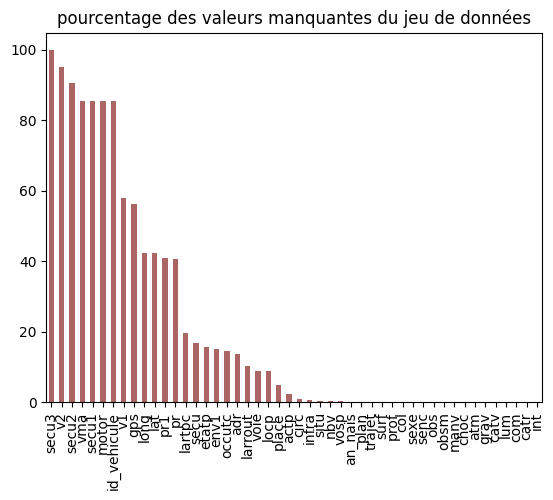

In [ ]:
#calcul du poucentage des valeures maquantes.
per_missing_values =(df.isna().sum()) / (len(df))*100
#lets emove the columns that has 0% (we don't need them in our bar chart)
per_missing_values = per_missing_values[per_missing_values > 0 ]
#sort the dataframe
per_missing_values = per_missing_values.sort_values(ascending=False)
per_missing_values.plot(kind='bar',title='pourcentage des valeurs manquantes du jeu de données',color='#ab6565');

In [ ]:
#Drop columns that are missing x% of the data: df.dropna(axis=1, thresh=(1-x/100)*len(df))
# Supprimer les colonnes avec plus de 85% de valeur manquantes
df = df.dropna(axis=1, thresh=(1-85/100)*len(df))


In [ ]:
#Drop columns that are completely missing data:
# df = df.dropna(axis=1, how='all')

In [ ]:
df.isna().sum(axis = 0)*100/len(df)

In [ ]:
# remplacer les valeurs manquantes par la médiane (variable numérique) et le mode (variable catégorielle)
numerics = ["int16", "int32", "int64", "float16", "float", "float", "float"]
VN_df = df.select_dtypes(include=numerics)
VN_name = VN_df.columns
df[VN_name] = df.loc[:, VN_name].fillna(df.loc[:, VN_name].median())


# drop variable numérique
#VC_df =df.drop(VN_name, axis=1)
#VC_name = VC_df.columns
#for column in VC_name:
#    df.loc[:, column].fillna(df.loc[:, column].mode()[0], inplace=True)

In [ ]:
df.isna().sum(axis = 0)*100/len(df)

Num_Acc     0.000000
place       0.000000
catu        0.000000
grav        0.000000
sexe        0.000000
trajet      0.181382
secu        0.000000
locp        0.000000
actp        0.000000
etatp       0.000000
an_nais     0.000000
num_veh     0.000000
senc        0.000000
catv        0.000000
occutc      0.000000
obs         0.000000
obsm        0.000000
choc        0.000000
manv        0.000000
an          0.000000
mois        0.000000
jour        0.000000
hrmn        0.000000
lum         0.000000
agg         0.000000
int         0.000000
atm         0.000000
col         0.000000
com         0.000000
adr         0.000000
gps         0.000000
lat        42.497092
long       42.497491
dep         0.000000
catr        0.000000
voie        0.000000
v1          0.000000
circ        0.000000
nbv         0.000000
pr          0.000000
pr1        40.845908
vosp        0.353429
prof        0.179507
plan        0.217602
lartpc     19.698444
larrout    10.187214
surf        0.179507
infra       0

In [ ]:
df["place"]=df["place"].fillna(df["place"].mode()[0])
df["grav"]=df["grav"].fillna(df["grav"].mode()[0])
df["sexe"]=df["sexe"].fillna(df["sexe"].mode()[0])
df["secu"]=df["secu"].fillna(df["secu"].mode()[0])
df["locp"]=df["locp"].fillna(df["locp"].mode()[0])

In [ ]:
df["actp"]=df["actp"].fillna(df["actp"].mode()[0])
df["etatp"]=df["etatp"].fillna(df["etatp"].mode()[0])
df["senc"]=df["senc"].fillna(df["senc"].mode()[0])
df["catv"]=df["catv"].fillna(df["catv"].mode()[0])
df["occutc"]=df["occutc"].fillna(df["occutc"].mode()[0])
df["obs"]=df["obs"].fillna(df["obs"].mode()[0])
df["obsm"]=df["obsm"].fillna(df["obsm"].mode()[0])
df["manv"]=df["manv"].fillna(df["manv"].mode()[0])
df["choc"]=df["choc"].fillna(df["choc"].mode()[0])
df["lum"]=df["lum"].fillna(df["lum"].mode()[0])
df["int"]=df["int"].fillna(df["int"].mode()[0])

In [ ]:
df["atm"]=df["atm"].fillna(df["atm"].mode()[0])
df["col"]=df["col"].fillna(df["col"].mode()[0])
df["com"]=df["com"].fillna(df["com"].mode()[0])
df["adr"]=df["adr"].fillna(df["adr"].mode()[0])
df["gps"]=df["gps"].fillna(df["gps"].mode()[0])
df["catr"]=df["catr"].fillna(df["catr"].mode()[0])
df["voie"]=df["voie"].fillna(df["voie"].mode()[0])
df["v1"]=df["v1"].fillna(df["v1"].mode()[0])
df["circ"]=df["circ"].fillna(df["circ"].mode()[0])
df["pr"]=df["pr"].fillna(df["pr"].mode()[0])

In [ ]:
# drop variable numérique
VC_df =df.drop(VN_name, axis=1)
VC_name = VC_df.columns
for column in VC_name:
    df.loc[:, column].fillna(df.loc[:, column].mode()[0], inplace=True)


In [ ]:
#df.drop(["grav", 'Num_Acc', 'an_nais', 'num_veh', 'lartpc', 'larrout', 'nbv', 'voie', 'adr', 'lat', 'long'], axis=1)
df.drop(['Num_Acc', 'an_nais', 'num_veh', 'lartpc', 'larrout', 'nbv', 'voie', 'adr', 'lat', 'long'],axis=1,inplace=True)
df.shape

(2506868, 40)

In [ ]:
numerics = ["int16", "int32", "int64", "float16", "float", "float", "float"]
new_df = df.select_dtypes(include=numerics)
new_df.shape

(688530, 24)

In [ ]:
y = new_df['grav']


y=y.replace({4.:'4',1.:'1',2.:'2',3.:'3'}).astype(int)
X = new_df.drop('grav',axis=1)

In [ ]:
y = y - 1


In [ ]:
X = X.astype(float)

In [ ]:
##
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X.shape

(688530, 23)

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
12050/12050 [==============================] - 53s 4ms/step - loss: 1.0491 - accuracy: 0.5478 - val_loss: 1.0221 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 2/20
12050/12050 [==============================] - 47s 4ms/step - loss: 1.0162 - accuracy: 0.5615 - val_loss: 1.0138 - val_accuracy: 0.5624 - lr: 0.0010
Epoch 3/20
12050/12050 [==============================] - 46s 4ms/step - loss: 1.0086 - accuracy: 0.5650 - val_loss: 1.0088 - val_accuracy: 0.5643 - lr: 0.0010
Epoch 4/20
12050/12050 [==============================] - 52s 4ms/step - loss: 1.0038 - accuracy: 0.5675 - val_loss: 1.0015 - val_accuracy: 0.5679 - lr: 0.0010
Epoch 5/20
12050/12050 [==============================] - 48s 4ms/step - loss: 0.9999 - accuracy: 0.5691 - val_loss: 0.9991 - val_accuracy: 0.5697 - lr: 0.0010
Epoch 6/20
12050/12050 [==============================] - 52s 4ms/step - loss: 0.9962 - accuracy: 0.5713 - val_loss: 0.9967 - val_accuracy: 0.5711 - lr: 0.0010
Epoch 7/20
12050/12050 [================

In [ ]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.5724244713783264


In [ ]:
#The loss and accuracy values are the most straightforward metrics to understand in the model.fit() output.
#The loss value represents how well the model is performing in terms of its ability to predict the correct labels.
#A lower loss value indicates a better performing model.
print(history.history['loss'])
print(history.history['accuracy'])


[1.0491108894348145, 1.016189455986023, 1.0086171627044678, 1.0038013458251953, 0.9998502135276794, 0.9961802959442139, 0.9939528703689575, 0.9913904070854187, 0.9897231459617615, 0.9878979921340942, 0.9865195155143738, 0.9848902225494385]
[0.547770082950592, 0.5615313053131104, 0.5650014281272888, 0.5675094127655029, 0.5691044330596924, 0.5712985396385193, 0.5722503662109375, 0.5726653337478638, 0.5737156867980957, 0.5739802122116089, 0.575354814529419, 0.5753600001335144]


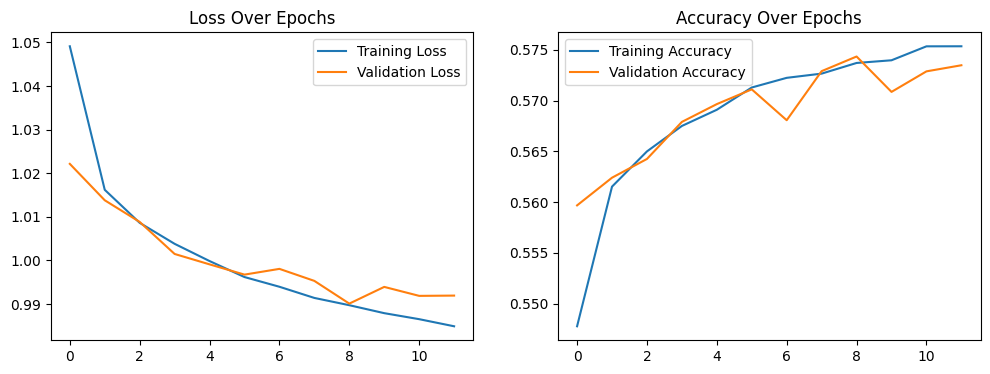

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
model.metrics

[]

In [ ]:
df.isna().sum(axis = 0)*100/len(df)

In [ ]:
df.columns

**Binary/Multiclass classification - Factor Analysis**

In [ ]:
df.shape

(2506868, 50)

In [ ]:
var_inutile = ['Num_Acc', 'an_nais', 'num_veh', 'lartpc', 'larrout', 'nbv', 'voie', 'adr', 'lat', 'long'] # 'nbv'= nombre total de voies de circulation
df = df.drop(labels=var_inutile, axis=1)
df.shape

(2506868, 40)

In [ ]:
df = df.dropna()
df.shape

(688530, 50)

In [ ]:
col_object = ['place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
        'lum', 'agg', 'int', 'atm', 'col', 'gps', 'catr', 'v1', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ',]
df[col_object] = df[col_object].astype('object')
df.dtypes.value_counts()

object     36
int64       3
float64     1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464535 entries, 0 to 2509725
Data columns (total 40 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   place   1464535 non-null  object 
 1   catu    1464535 non-null  object 
 2   grav    1464535 non-null  object 
 3   sexe    1464535 non-null  object 
 4   trajet  1464535 non-null  object 
 5   secu    1464535 non-null  object 
 6   locp    1464535 non-null  object 
 7   actp    1464535 non-null  object 
 8   etatp   1464535 non-null  object 
 9   senc    1464535 non-null  object 
 10  catv    1464535 non-null  object 
 11  occutc  1464535 non-null  object 
 12  obs     1464535 non-null  object 
 13  obsm    1464535 non-null  object 
 14  choc    1464535 non-null  object 
 15  manv    1464535 non-null  object 
 16  an      1464535 non-null  int64  
 17  mois    1464535 non-null  int64  
 18  jour    1464535 non-null  int64  
 19  hrmn    1464535 non-null  object 
 20  lum     1464535 non-null

In [ ]:
df.place.value_counts()

1.0    575652
3.0     69521
0.0     27135
4.0      7811
2.0      6673
5.0      1722
8.0        16
Name: situ, dtype: int64

In [ ]:
df = df.dropna()
df.shape

(688530, 50)

In [ ]:
var = ["an", "mois", "jour", "catu", "grav", "sexe", "trajet", "locp", "etatp", "senc", "obsm", "choc", "lum", "int", "agg", "atm", "col", "gps", "catr", "circ", "vosp", "prof", "plan", "surf", "infra", "situ"]
df = df.loc[:, var]
df.shape

(688530, 26)

In [ ]:
df = df.dropna()
df.shape

(2480397, 26)

In [ ]:
dfnew = df.copy()

In [ ]:
# Recode Variable
#1)
catu_mapping = {1: "Conducteur"
,2: "Passager"
,3: "Piéton"
,4: "Autre"}
dfnew = dfnew.assign(catu_temp  = dfnew.catu.map(catu_mapping))
#2)
grav_mapping = {1:'Indemme'
                    ,2:'Tué'
                    ,3:'Blessé_hospitalisé'
                    ,4:'Blessé_léger'
                    }
dfnew = dfnew.assign(grav_temp  = dfnew.grav.map(grav_mapping))
#3)
sexe_mapping = {1: "Masculin"
,2: "Féminin"}
dfnew = dfnew.assign(sexe_temp  = dfnew.sexe.map(sexe_mapping))
#4)
trajet_mapping = {0: "Non_renseigné"
,1: "Domicile_travail"
,2: "Domicile_école"
,3: "Courses_achats"
,4: "Utilisation_professionnelle"
,5: "Promenade_loisirs"
,9: "Autre"}
dfnew = dfnew.assign(trajet_temp  = dfnew.trajet.map(trajet_mapping))
#5)
locp_mapping = {0: "Sans_objet"
,1: "Aplus_passage_piéton"
,2: "Amoin_passage_piéton"
,3: "Sans_sig_lumineuse"
,4: "Avec_sig_lumineuse"
,5: "Sur_trottoir"
,6: "Sur_accotement"
,7: "Sur_refuge"
,8: "Sur_contre_allée"
,9: "Inconnue"}
dfnew = dfnew.assign(locp_temp  = dfnew.locp.map(locp_mapping))
#6)
etatp_mapping = {0: "Sans_objet"
,1: "Seul"
,2: "Accompagné"
,3: "En_groupe"}
dfnew = dfnew.assign(etatp_temp  = dfnew.etatp.map(etatp_mapping))
#7)
senc_mapping = {0: "Inconnu"
,1: "PK_croissant"
,2: "PK_décroissant"
,3: "Absence_repére"}
dfnew = dfnew.assign(senc_temp  = dfnew.senc.map(senc_mapping))
#8)
obsm_mapping = {0: "Aucun"
,1: "Piéton"
,2: "Véhicule"
,4: "Véhicule_rail"
,5: "Animal_domestique"
,6: "Animal_sauvage"
,9: "Autre"}
dfnew = dfnew.assign(obsm_temp  = dfnew.obsm.map(obsm_mapping))
#9)
choc_mapping = {0: "Aucun"
,1: "Avant"
,2: "Avant_droit"
,3: "Avant_gauche"
,4: "Arriére"
,5: "Arriére_droit"
,6: "Arriére_gauche"
,7: "Côté_droit"
,8: "Côté_gauche"
,9: "Chocs_multiples"}
dfnew = dfnew.assign(choc_temp  = dfnew.choc.map(choc_mapping))
#10)
lum_mapping = {1: "Plein_jour"
,2: "Crépuscule_aube"
,3: "Nuit_sans_éclairage"
,4: "Nuit_avec_éclairage_non_allumé"
,5: "Nuit_avec_éclairage_allumé"}
dfnew = dfnew.assign(lum_temp  = dfnew.lum.map(lum_mapping))
#11)
int_mapping = {1: "Hors_intersection"
,2: "Intersection_X"
,3: "Intersection_T"
,4: "Intersection_Y"
,5: "Intersection_4"
,6: "Giratoire"
,7: "Place"
,8: "Passage_niveau"
,9: "Autre_intersection"}
dfnew = dfnew.assign(int_temp  = dfnew.int.map(int_mapping))
#12)
agg_mapping = {1: "Hors_agglomération"
,2: "En_agglomération"}
dfnew = dfnew.assign(agg_temp  = dfnew["agg"].map(agg_mapping))
#13)
atm_mapping = {1: "Normale"
,2: "Pluie_légère"
,3: "Pluie_forte"
,4: "Neige_grêle"
,5: "Brouillard_fumée"
,6: "Vent_fort_tempête"
,7: "Temps_éblouissant"
,8: "Temps_couvert"
,9: "Autre"}
dfnew = dfnew.assign(atm_temp  = dfnew.atm.map(atm_mapping))
#14)
col_mapping = { 1: "Deux_véhicules_frontale"
,2: "Deux_véhicules_par_arrière"
,3: "Deux_véhicules_par_coté"
,4: "Trois_véhicules_chaîne"
,5: "Trois_véhicules_collisions"
,6: "Autre_collision"
,7: "Sans_collision"}
dfnew = dfnew.assign(col_temp  = dfnew.col.map(col_mapping))
#15)
gps_mapping = { "M": "Métropole"
,"A": "Antilles"
,"R": "Réunion"
,"G": "Guyane"
,"Y": "Mayotte"
,"O": "Wallis_Futuna"#
,"C": "Nouvelle_Calédonie"}
dfnew = dfnew.assign(gps_temp  = dfnew.gps.map(gps_mapping))
#16)
catr_mapping = { 1: "Autoroute"
,2: "Route_nationale"
,3: "Route_départementale"
,4: "Voie_communales"
,5: "Hors_réseau_public"
,6: "Parc_stationnement"
,7: "Routes_métropole_urbaine"
,9: "Autre"}
dfnew = dfnew.assign(catr_temp  = dfnew.catr.map(catr_mapping))
#17)
circ_mapping = { 0: "Sans_objet"
,1: "Sens_unique"
,2: "Bidirectionnelle"
,3: "chaussées_séparées"
,4: "Avec_voies_variable"}
dfnew = dfnew.assign(circ_temp  = dfnew.circ.map(circ_mapping))
#18)
vosp_mapping = {0: "Sans_objet"
,1: "piste_cyclable"
,2: "Bande_cyclable"
,3: "Voie_réservée"}
dfnew = dfnew.assign(vosp_temp  = dfnew.vosp.map(vosp_mapping))
#19)
prof_mapping = {0: "Sans_objet"
,1: "Plat"
,2: "Pente"
,3: "Sommet_côte"
,4: "Bas_côte"}
dfnew = dfnew.assign(prof_temp  = dfnew.prof.map(prof_mapping))
#20)
plan_mapping = {0: "Sans_objet"
,1: "Partie_rectiligne"
,2: "Courbe_gauche"
,3: "Courbe_droite"
,4: "Plan_S"}
dfnew = dfnew.assign(plan_temp  = dfnew.plan.map(plan_mapping))
#21)
surf_mapping = {0: "Sans_objet"
,1: "Normale"
,2: "Mouillée"
,3: "Flaques"
,4: "Inondée"
,5: "Enneigée"
,6: "Boue"
,7: "Verglacée"
,8: "Corps_gras_huile"
,9: "Autre"}
dfnew = dfnew.assign(surf_temp  = dfnew.surf.map(surf_mapping))
#22)
infra_mapping = {0: "Aucun"
,1: "Souterrain_tunnel"
,2: "Pont_autopont"
,3: "Bretelle_échangeur"
,4: "Voie_ferrée"
,5: "Carrefour_aménagé"
,6: "Zone_piétonne"
,7: "Zone_péage"
,8: "Chantier"
,9: "Autres"}
dfnew = dfnew.assign(infra_temp  = dfnew.infra.map(infra_mapping))
#23)
situ_mapping = {0: "Aucun"
,1: "Sur_chaussée"
,2: "Sur_bande_urgence"
,3: "Sur_accotement"
,4: "Sur_trottoir"
,5: "Sur_piste_cyclable"
,6: "Sur_autre_spéciale"
,8: "Autres"}
dfnew = dfnew.assign(situ_temp  = dfnew.situ.map(situ_mapping))
var_to_drop = ["catu", "grav", "sexe", "trajet", "locp", "etatp", "senc", "obsm", "choc", "lum", "int", "agg", "atm", "col", "gps", "catr", "circ", "vosp", "prof", "plan", "surf", "infra", "situ"]
dfnew = dfnew.drop(var_to_drop, axis=1)
dfnew.head()


,an,mois,jour,catu_temp,grav_temp,sexe_temp,trajet_temp,locp_temp,etatp_temp,senc_temp,...,col_temp,gps_temp,catr_temp,circ_temp,vosp_temp,prof_temp,plan_temp,surf_temp,infra_temp,situ_temp
0,5,1,12,Conducteur,Blessé_léger,Masculin,Domicile_travail,Sans_objet,Sans_objet,Inconnu,...,Deux_véhicules_par_coté,Métropole,Route_départementale,Bidirectionnelle,Sans_objet,Plat,Partie_rectiligne,Normale,Aucun,Sur_chaussée
1,5,1,12,Conducteur,Blessé_hospitalisé,Féminin,Courses_achats,Sans_objet,Sans_objet,Inconnu,...,Deux_véhicules_par_coté,Métropole,Route_départementale,Bidirectionnelle,Sans_objet,Plat,Partie_rectiligne,Normale,Aucun,Sur_chaussée
2,5,1,12,Passager,Indemme,Masculin,Non_renseigné,Sans_objet,Sans_objet,Inconnu,...,Deux_véhicules_par_coté,Métropole,Route_départementale,Bidirectionnelle,Sans_objet,Plat,Partie_rectiligne,Normale,Aucun,Sur_chaussée
3,5,1,12,Passager,Indemme,Masculin,Non_renseigné,Sans_objet,Sans_objet,Inconnu,...,Deux_véhicules_par_coté,Métropole,Route_départementale,Bidirectionnelle,Sans_objet,Plat,Partie_rectiligne,Normale,Aucun,Sur_chaussée
4,5,1,12,Passager,Indemme,Masculin,Non_renseigné,Sans_objet,Sans_objet,Inconnu,...,Deux_véhicules_par_coté,Métropole,Route_départementale,Bidirectionnelle,Sans_objet,Plat,Partie_rectiligne,Normale,Aucun,Sur_chaussée


In [ ]:
#dfnew = df.copy()
dfnew.shape

(688530, 26)

In [ ]:
#dfnew.info()
#dfnew =  dfnew.dropna()
#df.isna().sum(axis = 0)*100/len(df)
dfnew = dfnew.drop(["int_temp", "grav_temp"], axis=1)

In [ ]:
#dfnew.isna().sum(axis = 0)*100/len(dfnew)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688530 entries, 0 to 2509362
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   an           688530 non-null  int64 
 1   mois         688530 non-null  int64 
 2   jour         688530 non-null  int64 
 3   catu_temp    688530 non-null  object
 4   sexe_temp    688530 non-null  object
 5   trajet_temp  688530 non-null  object
 6   locp_temp    688530 non-null  object
 7   etatp_temp   688530 non-null  object
 8   senc_temp    688530 non-null  object
 9   obsm_temp    688530 non-null  object
 10  choc_temp    688530 non-null  object
 11  lum_temp     688530 non-null  object
 12  agg_temp     688530 non-null  object
 13  atm_temp     688530 non-null  object
 14  col_temp     688530 non-null  object
 15  gps_temp     688530 non-null  object
 16  catr_temp    688530 non-null  object
 17  circ_temp    688530 non-null  object
 18  vosp_temp    688530 non-null  object
 19  p

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 45.4 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=7e9e7c5e544a6e0c07edd506d27858e2dfe9041c76fbbc40377e5411e4735e63
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
## Ordinal Encoding
def ordinal_encode(series, categories):
  encoder = OrdinalEncoder(categories=categories, dtype=np.int64)
  return encoder.fit_transform(series.values.reshape(-1, 1))

In [ ]:
categories_ordenc = {"sexe_temp": [["Féminin", "Masculin"]],
                     "agg_temp": [["Hors_agglomération", "En_agglomération"]]
                     }

for column, category in categories_ordenc.items():
  dfnew[column] = ordinal_encode(dfnew[column], category)

In [ ]:
#df.head()

,an,mois,jour,sexe_temp,int_temp,agg_temp,atm_temp,col_temp,gps_temp,catr_temp,...,choc_temp_Arriére,choc_temp_Arriére_droit,choc_temp_Arriére_gauche,choc_temp_Côté_droit,choc_temp_Côté_gauche,choc_temp_Chocs_multiples,lum_temp_Crépuscule_aube,lum_temp_Nuit_sans_éclairage,lum_temp_Nuit_avec_éclairage_non_allumé,lum_temp_Nuit_avec_éclairage_allumé
0,5,1,12,Masculin,Hors_intersection,En_agglomération,Normale,Deux_véhicules_par_coté,Métropole,Route_départementale,...,0,0,0,0,0,0,0,1,0,0
1,5,1,12,Féminin,Hors_intersection,En_agglomération,Normale,Deux_véhicules_par_coté,Métropole,Route_départementale,...,0,0,0,0,1,0,0,1,0,0
2,5,1,12,Masculin,Hors_intersection,En_agglomération,Normale,Deux_véhicules_par_coté,Métropole,Route_départementale,...,0,0,0,0,1,0,0,1,0,0
3,5,1,12,Masculin,Hors_intersection,En_agglomération,Normale,Deux_véhicules_par_coté,Métropole,Route_départementale,...,0,0,0,0,1,0,0,1,0,0
4,5,1,12,Masculin,Hors_intersection,En_agglomération,Normale,Deux_véhicules_par_coté,Métropole,Route_départementale,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
## (Dummy) One Hot Encoding
def onehot_encode(df, column, categories):
  encoder = OneHotEncoder(categories=categories, drop="first", sparse=False, dtype=np.int64, handle_unknown='ignore')
  encoded_features = encoder.fit_transform(df[column].values.reshape(-1, 1))
  encoder.transform(df[column].values.reshape(-1, 1))

  df = df.drop(labels=column, axis=1)

  for j, category in enumerate(categories[0][1:]):
    category_column_name = "{}_{}".format(column, category)
    df[category_column_name] = encoded_features[:, j]

  return df

In [ ]:
sel_var = ["gps_temp_Métropole", "catu_temp_Contucteur", "trajet_temp_Courses_achats", "locp_temp_Sans_sig_lumineuse", "etatp_temp_Seul", "obsm_temp_Véhicule", "choc_temp_Avant", "lum_temp_Plein_jour",
"atm_temp_Pluie_forte", "col_temp_Deux_véhicules_frontale", "catr_temp_Voie_communales", "circ_temp_Sens_unique", "vosp_temp_piste_cyclable", "prof_temp_Plat", "plan_temp_Partie_rectiligne",
"surf_temp_Normale", "infra_temp_Carrefour_aménagé", "situ_temp_Sur_accotemen"]
df.senc.value_counts()

0.0    589809
1.0     54628
2.0     44081
3.0        12
Name: senc, dtype: int64

In [ ]:

# "int_temp": [["Hors_intersection", "Intersection_X", "Intersection_T", "Intersection_Y", "Intersection_4", "Giratoire", "Place", "Passage_niveau", "Autre_intersection"]],
# "gps_temp": [["Métropole", "Antilles", "Réunion", "Guyane", "Mayotte", "Wallis_Futuna", "Nouvelle_Calédonie"]],
# "grav_temp": [["Indemme", "Tué", "Blessé_hospitalisé", "Blessé_léger"]],
categories_hotenc = {
                     "gps_temp": [["other", "Métropole", "Antilles", "Réunion", "Guyane", "Mayotte", "Wallis_Futuna", "Nouvelle_Calédonie"]],
                     "catu_temp": [["other", "Conducteur", "Passager", "Piéton", "Autre"]],
                     "trajet_temp": [["other", "Non_renseigné", "Domicile_travail", "Domicile_école", "Courses_achats", "Utilisation_professionnelle", "Promenade_loisirs", "Autre"]],
                     "locp_temp": [["other", "Sans_objet", "Aplus_passage_piéton", "Amoin_passage_piéton", "Sans_sig_lumineuse", "Avec_sig_lumineuse", "Sur_trottoir", "Sur_accotement", "Sur_refuge", "Sur_contre_allée", "Inconnue"]],
                     "etatp_temp": [["other", "Sans_objet", "Seul", "Accompagné", "En_groupe"]],
                     "senc_temp": [["other", "Inconnu", "PK_croissant", "PK_décroissant", "Absence_repére"]],
                     "obsm_temp": [["other", "Aucun", "Piéton", "Véhicule", "Véhicule_rail", "Animal_domestique", "Animal_sauvage", "Autre"]],
                     "choc_temp": [["other", "Aucun", "Avant", "Avant_droit", "Avant_gauche", "Arriére", "Arriére_droit", "Arriére_gauche", "Côté_droit", "Côté_gauche", "Chocs_multiples"]],
                     "lum_temp": [["other", "Plein_jour", "Crépuscule_aube", "Nuit_sans_éclairage", "Nuit_avec_éclairage_non_allumé", "Nuit_avec_éclairage_allumé"]],

                     "atm_temp": [["other", "Normale", "Pluie_légère", "Pluie_forte", "Neige_grêle", "Brouillard_fumée", "Vent_fort_tempête", "Temps_éblouissant", "Temps_couvert", "Autre"]],
                     "col_temp": [["other", "Deux_véhicules_frontale", "Deux_véhicules_par_arrière", "Deux_véhicules_par_coté", "Trois_véhicules_chaîne", "Trois_véhicules_collisions", "Autre_collision", "Sans_collision"]],

                     "catr_temp": [["other", "Autoroute", "Route_nationale", "Route_départementale", "Voie_communales", "Hors_réseau_public", "Parc_stationnement", "Routes_métropole_urbaine", "Autre"]],
                     "circ_temp": [["other", "Sans_objet", "Sens_unique", "Bidirectionnelle", "chaussées_séparées", "Avec_voies_variable"]],
                     "vosp_temp": [["other", "Sans_objet", "piste_cyclable", "Bande_cyclable", "Voie_réservée"]],
                     "prof_temp": [["other", "Sans_objet", "Plat", "Pente", "Sommet_côte", "Bas_côte"]],
                     "plan_temp": [["other", "Sans_objet", "Partie_rectiligne", "Courbe_gauche", "Courbe_droite", "Plan_S"]],
                     "surf_temp": [["other", "Sans_objet", "Normale", "Mouillée", "Flaques", "Inondée", "Enneigée", "Boue", "Verglacée", "Corps_gras_huile", "Autre"]],
                     "infra_temp": [["other", "Aucun", "Souterrain_tunnel", "Pont_autopont", "Bretelle_échangeur", "Voie_ferrée", "Carrefour_aménagé", "Zone_piétonne", "Zone_péage", "Chantier", "Autres"]],
                     "situ_temp": [["other", "Aucun", "Sur_chaussée", "Sur_bande_urgence", "Sur_accotement", "Sur_trottoir", "Sur_piste_cyclable", "Sur_autre_spéciale", "Autres"]]}
for column, category in categories_hotenc.items():
  dfnew = onehot_encode(dfnew, column, category)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
#dfnew = dfnew.drop(["int_temp", "gps_temp"], axis=1)

In [ ]:
dfnew.head()

,an,mois,jour,sexe_temp,agg_temp,gps_temp_Métropole,gps_temp_Antilles,gps_temp_Réunion,gps_temp_Guyane,gps_temp_Mayotte,...,infra_temp_Chantier,infra_temp_Autres,situ_temp_Aucun,situ_temp_Sur_chaussée,situ_temp_Sur_bande_urgence,situ_temp_Sur_accotement,situ_temp_Sur_trottoir,situ_temp_Sur_piste_cyclable,situ_temp_Sur_autre_spéciale,situ_temp_Autres
0,5,1,12,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5,1,12,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,1,12,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5,1,12,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,1,12,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = dfnew
y = df[["grav"]]
y = y.replace({4.:'4',1.:'1',2.:'2',3.:'3'}).astype(int)

In [ ]:
X.shape

(688530, 20)

In [ ]:
#variable = ['an', 'mois', 'jour', 'sexe_temp', 'agg_temp', 'catu_temp_Passager',
#       'catu_temp_Piéton', 'catu_temp_Autre', 'trajet_temp_Domicile_travail',
#       'trajet_temp_Domicile_école']
#X = X.iloc[:, 0:20] "['catu_temp_Passager', 'lum_temp_Crépuscule_aube', 'col_temp_Deux_véhicules_par_coté', 'situ_temp_Sur_chaussée'] not in index"
sel_var = ['an', 'mois', 'jour', 'sexe_temp', 'agg_temp', "gps_temp_Antilles", "catu_temp_Passager", "trajet_temp_Courses_achats", "locp_temp_Sans_sig_lumineuse", "etatp_temp_Seul", "obsm_temp_Véhicule", "choc_temp_Avant", "lum_temp_Crépuscule_aube",
"atm_temp_Pluie_forte", "col_temp_Deux_véhicules_par_coté", "catr_temp_Voie_communales", "circ_temp_Sens_unique", "vosp_temp_piste_cyclable", "prof_temp_Plat", "plan_temp_Partie_rectiligne",
"surf_temp_Normale", "infra_temp_Carrefour_aménagé", "situ_temp_Sur_chaussée"]
X = X.loc[:, sel_var]


# Neuer Abschnitt
Sampling Adequacy - Kaiser-Meyer-Olkin (KMO) test

In [ ]:
#Sampling Adequacy - Kaiser-Meyer-Olkin (KMO) test

#Le test KMO mesure l’adéquation des données à l’analyse factorielle.
#Il détermine l'adéquation pour chaque variable observée et pour le modèle complet.
#KMO estime la proportion de variance entre toutes les variables observées. Une proportion plus faible convient mieux à l’analyse factorielle.
#Les valeurs de KMO varient entre 0 et 1. Une valeur de KMO inférieure à 0,6 est considérée comme insuffisante.


kmo_all, kmo_model = calculate_kmo(X)

print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature:\n{}".format(kmo_all.round(3)))


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Overall KMO = 0.576
KMO per feature:
[0.467 0.634 0.592 0.47  0.595 0.508 0.554 0.6   0.608 0.587 0.558 0.334
 0.551 0.507 0.617 0.562 0.601 0.601 0.601 0.633 0.554 0.648 0.578]


In [ ]:
chi_square_value, p_value = calculate_bartlett_sphericity(X)
chi_square_value, p_value

(730961.2570381849, 0.0)

In [ ]:
# Variables considered adequate by the KMO test
kmo_passed = list(X.columns[kmo_all >= 0.5])
kmo_passed

['mois',
 'jour',
 'agg_temp',
 'gps_temp_Antilles',
 'catu_temp_Passager',
 'trajet_temp_Courses_achats',
 'locp_temp_Sans_sig_lumineuse',
 'etatp_temp_Seul',
 'obsm_temp_Véhicule',
 'lum_temp_Crépuscule_aube',
 'atm_temp_Pluie_forte',
 'col_temp_Deux_véhicules_par_coté',
 'catr_temp_Voie_communales',
 'circ_temp_Sens_unique',
 'vosp_temp_piste_cyclable',
 'prof_temp_Plat',
 'plan_temp_Partie_rectiligne',
 'surf_temp_Normale',
 'infra_temp_Carrefour_aménagé',
 'situ_temp_Sur_chaussée']

In [ ]:
# Variables considered inadequate by the KMO test
kmo_failed = list(X.columns[kmo_all < 0.5])
kmo_failed

['an', 'sexe_temp', 'choc_temp_Avant']

In [ ]:
kmo_passed = list(X.columns[kmo_all >= 0.5])
X_kmo = X[kmo_passed]

kmo_all, kmo_model = calculate_kmo(X_kmo)

print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature:\n{}".format(kmo_all.round(3)))

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Overall KMO = 0.592
KMO per feature:
[0.636 0.592 0.597 0.509 0.708 0.657 0.603 0.588 0.571 0.549 0.506 0.642
 0.561 0.611 0.599 0.601 0.632 0.554 0.651 0.581]


In [ ]:
X = X_kmo.copy()

In [ ]:
def train_factor_model(dataset, number_of_factors, rotation="varimax"):
  factor_model = FactorAnalyzer(n_factors=number_of_factors, rotation=rotation)
  factor_model.fit(dataset)

  return factor_model

In [ ]:
def scree_plot(eigenvalues, n_columns):
  plt.style.use("fivethirtyeight")
  # Create scree plot using matplotlib
  fig, ax = plt.subplots(figsize=(10, 6))

  ax.scatter(range(1, n_columns + 1), eigenvalues, s=50)
  ax.plot(range(1, n_columns + 1), eigenvalues)

  ax.set_title('Scree Plot')
  ax.set_xlabel('# Factors')
  ax.set_ylabel('Eigenvalues')

  ax.grid(False)

  ax.axhline(y=1, linestyle="--", color="grey", linewidth=1)
  # plt.savefig("scree_plot.png", transparent=True, dpi=600)
  plt.show()

In [ ]:
def loadings_plot(loadings, variables):
  # Create loadings plot using matplotlib
  fig, ax = plt.subplots(figsize=(15, 5))

  image = ax.matshow(loadings, cmap="hot")

  n_factors = loadings.shape[1]
  factors = ["Factor{}".format(index) for index in range(n_factors)]

  ax.set_yticklabels([""] + variables, fontsize=10)
  ax.set_xticklabels([""] + factors, rotation="vertical", fontsize=10)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.grid(False)

  plt.colorbar(image)
  plt.tight_layout()
  plt.show()

In [ ]:
factor_model = train_factor_model(X, len(X.columns), rotation="oblimin")

In [ ]:
# Choosing the Number of Factors
eigenvalues, common_factor_eigenvalues = factor_model.get_eigenvalues()

In [ ]:
eigenvalues

array([1.86825259, 1.71426312, 1.28226839, 1.16907004, 1.14158484,
       1.04241347, 1.01535366, 1.00706542, 0.99957751, 0.99827494,
       0.98134188, 0.96194951, 0.92923136, 0.89048003, 0.76918701,
       0.74611573, 0.68916145, 0.67312295, 0.61078446, 0.51050165])

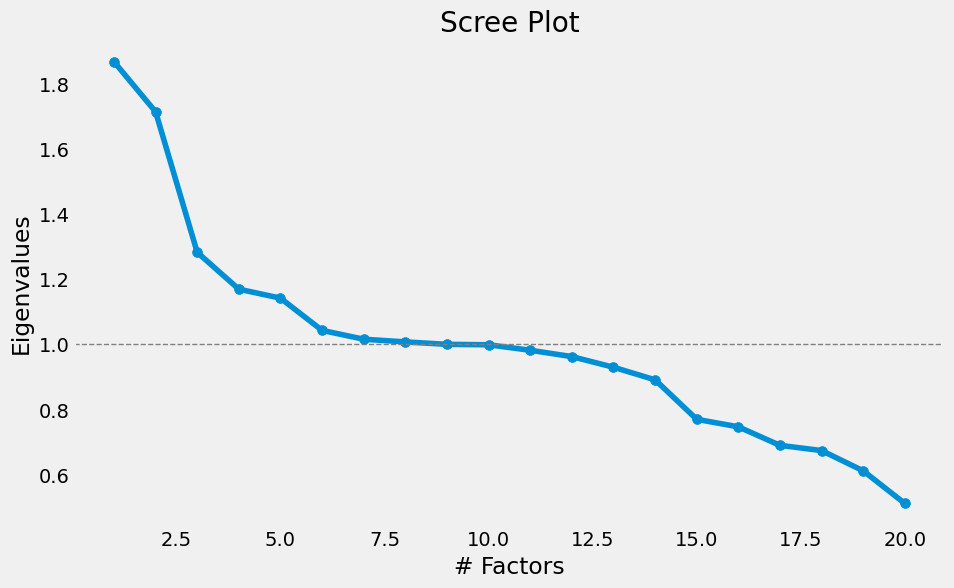

In [ ]:
n_columns = len(X.columns)
scree_plot(eigenvalues, n_columns=n_columns)

In [ ]:
number_of_factors = sum(eigenvalues > 1)
factor_model = train_factor_model(X, number_of_factors, rotation="promax")

<ipython-input-32-8b1479f7c88e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + variables, fontsize=10)
<ipython-input-32-8b1479f7c88e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + factors, rotation="vertical", fontsize=10)


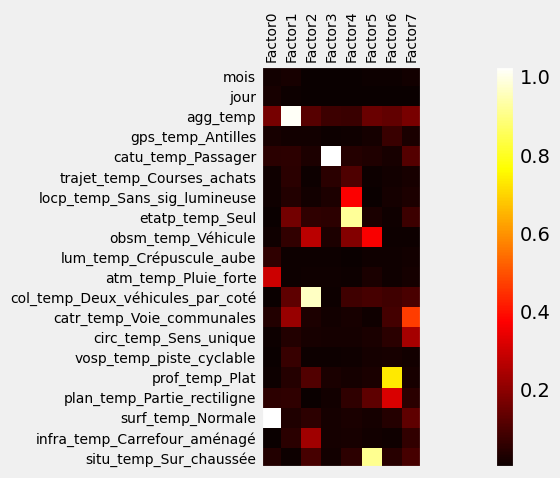

In [ ]:

loadings = factor_model.loadings_
loadings_abs = np.abs(loadings)

columns = X.columns.tolist()
loadings_plot(loadings_abs, columns)



In [ ]:
#regrouper les facteurs
n_factors = loadings.shape[1]
factors_list = ["Factor{}".format(index) for index in range(n_factors)]
factors = {}.fromkeys(factors_list, None)
for key in factors:
  factors[key] = []

argsmax = loadings_abs.argmax(axis=1)
for argmax, column in zip(argsmax, columns):
  factors[factors_list[argmax]].append(column)

In [ ]:
factors

{'Factor0': ['jour',
  'lum_temp_Crépuscule_aube',
  'atm_temp_Pluie_forte',
  'surf_temp_Normale'],
 'Factor1': ['mois', 'agg_temp', 'vosp_temp_piste_cyclable'],
 'Factor2': ['col_temp_Deux_véhicules_par_coté',
  'infra_temp_Carrefour_aménagé'],
 'Factor3': ['catu_temp_Passager'],
 'Factor4': ['trajet_temp_Courses_achats',
  'locp_temp_Sans_sig_lumineuse',
  'etatp_temp_Seul'],
 'Factor5': ['obsm_temp_Véhicule', 'situ_temp_Sur_chaussée'],
 'Factor6': ['gps_temp_Antilles',
  'prof_temp_Plat',
  'plan_temp_Partie_rectiligne'],
 'Factor7': ['catr_temp_Voie_communales', 'circ_temp_Sens_unique']}

# Modell

In [ ]:
X_latent = factor_model.transform(X)
y_multiclass = np.array(y).ravel()

In [ ]:
y_multiclass

array([4, 3, 1, ..., 3, 1, 4])

In [ ]:
def train(X, y, grid_params, seed):

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

  # The models dict has same keys as grid_params
  # pointing to the grid search of each classifier
  models = {
      #"SGD": SGDClassifier(),
      "Logistic Regression": LogisticRegression()
      #"Random Forest": RandomForestClassifier(),
      #"AdaBoost": AdaBoostClassifier(),
      #"GradientBoost": GradientBoostingClassifier()
  }

  # store best estimators
  best_estimators = dict.fromkeys(models.keys())

  for model_name in models:
    base_clf = models[model_name]
    params = grid_params[model_name]

    print("[INFO] Performing Grid-Search CV ---- {}".format(model_name))
    model = GridSearchCV(base_clf, params, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

    model.fit(X_train, y_train)
    best_estimators[model_name] = model.best_estimator_

  return best_estimators, X_test, y_test

In [ ]:
def evaluate_multiclass(models, X_test, y_test):
  results = pd.DataFrame(columns=["Overall Accuracy"], index=models.keys())

  for model_name, model in models.items():
    n_samples = len(y_test)
    y_pred = model.predict(X_test)

    overall_accuracy = np.sum(y_pred == y_test) / n_samples
    results.loc[model_name, :] = overall_accuracy

  return results

In [ ]:
def select_multiclass_model(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)

    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return models[best_model]

Multiclass **Classification**

In [ ]:
grid_params_multiclass = {
   # "SGD": {
   #     "penalty": ["l1", "l2", "elasticnet"],
   #     "alpha": np.linspace(1e-5, 1e-3, 5),
   #     "learning_rate": ["optimal", "invscaling", "adaptive"],
   #     "eta0": np.linspace(1e-4, 1e-1, 5)
   # },
   "Logistic Regression": {
        "penalty": ["l1", "l2"],
        "C": [1, 2, 4, 5],
        "solver": ["liblinear"]
    }
    #"Random Forest": {
    #    "criterion": ["gini", "entropy"],
    #    "max_depth": np.linspace(3, 12, 4, dtype=np.int64),
    #    "min_samples_split": np.linspace(0.1, 0.5, 6),
    #    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    #    "max_features":["log2","sqrt"]
    #}
    #"AdaBoost": {
     #   "base_estimator": [DecisionTreeClassifier(max_depth=1),
     #                      DecisionTreeClassifier(max_depth=2),
      #                     DecisionTreeClassifier(max_depth=3)],
      #  "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
      #  "n_estimators": np.linspace(20, 80, 4, dtype=np.int64),
   # }
    #"GradientBoost": {
    #    "loss":["deviance"],
    #    "learning_rate": [0.01, 0.025, 0.05, 0.075],
    #    "min_samples_split": np.linspace(0.1, 0.5, 5),
    #    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    #    "max_depth":[3, 5, 8],
    #    "max_features":["log2","sqrt"],
    #    "criterion": ["friedman_mse"],
    #   "subsample":[0.5, 0.618, 0.85],
    #    "n_estimators":[5, 10, 15]
   # }
}

In [ ]:
## Train and evaluate binary model with factor analysis (latent) variables
seed = 42
estimators_multiclass_latent, X_test_latent, y_test_multiclass = train(X_latent, y_multiclass,
                                                                       grid_params_multiclass, seed)

evaluate_multiclass(estimators_multiclass_latent, X_test_latent, y_test_multiclass)

[INFO] Performing Grid-Search CV ---- Logistic Regression


,Overall Accuracy
Logistic Regression,0.427251


In [ ]:
## Train and evaluate binary model with the original variables (without factor analysis)
estimators_multiclass, X_test, y_test_multiclass = train(X, y_multiclass,
                                                         grid_params_multiclass,
                                                         seed)

evaluate_multiclass(estimators_multiclass, X_test, y_test_multiclass)

[INFO] Performing Grid-Search CV ---- Logistic Regression


,Overall Accuracy
Logistic Regression,0.432392


In [ ]:
estimators_multiclass, X_test, y_test_multiclass = train(X, y_multiclass,
                                                         grid_params_multiclass,
                                                         seed)

evaluate_multiclass(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
best_latent_multiclass_model = select_multiclass_model(estimators_multiclass_latent, X_test_latent, y_test_multiclass)

Logistic Regression
Overall accuracy = 0.4273


In [ ]:
best_multiclass_model = select_multiclass_model(estimators_multiclass, X_test, y_test_multiclass)

Logistic Regression
Overall accuracy = 0.4324


In [ ]:
def classification_repot(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    C = classification_report(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(C)

classifition = classification_repot(estimators_multiclass, X_test, y_test_multiclass)
#y_pred = estimators_multiclass.predict(X_test)
#print("Evaluation détaillée de la Classification par RDF :\n \n" ,
#      (classification_report(y_test_multiclass, y_pred)))
#cnf_matrix = confusion_matrix(y_test_multiclass, y_pred)
#print(cnf_matrix)
#classification_report, accuracy_score, confusion_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.43      0.78      0.55     51078
           2       0.00      0.00      0.00      8005
           3       0.44      0.42      0.43     45662
           4       0.38      0.02      0.03     32961

    accuracy                           0.43    137706
   macro avg       0.31      0.30      0.25    137706
weighted avg       0.40      0.43      0.36    137706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def confusion_m(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(cnf_matrix)

#cnf_matrix = confusion_m(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
cnf_matrix = confusion_m(estimators_multiclass, X_test, y_test_multiclass)

TypeError: ignored

In [ ]:
from tabulate import tabulate
table = [['Variables', 'description des Variables'], ['Num_Acc', "Numéro d’identifiant de l’accident"], ['place', "Permet de situer la place occupée dans le véhicule par l’usager au moment de l’accident"], ['catu', "Catégorie d’usager"], ['grav', "Gravité de blessure de l’usager"], ['sexe', "Sexe de l’usager"], ['trajet', "Motif du déplacement au moment de l’accident"],
         ['secu', "Le renseignement du caractére indique le présence et l’utilisation de l’équipement de sécurité"], ['locp', "Localisation du piéton"], ['actp', "Action du piéton"], ['etatp', "Cette variable permet de préciser si le piéton accidenté était seul ou non"], ['an_nais', "Année de naissance de l’usager"], ['num_veh', "Identifiant du véhicule repris pour chacun des usagers occupant de véhicule"], ['senc', "Sens de circulation"], ['catv', "Catégorie du véhicule"], ['occutc', "Nombre d’occupants dans le transport en commun"],
         ['obs', "Obstacle fixe heurté"], ['obsm', "Obstacle mobile heurté"], ['choc', "Point de choc initial"], ['manv', "Manoeuvre principale avant l’accident"], ['an', "Année de l’accident"], ['mois', "Mois de l’accident"], ['jour', "Jour de l’accident"], ['hrmn', "Heure et minutes de l’accident"], ['lum', "Lumière: conditions d’éclairage dans lesquelles l’accident s’est produit"],
         ['agg', "Localisation"], ['int', "Intersection"], ['atm', "Conditions atmosphériques"], ['col', "Type de collision"], ['com', "Commune: Le numéro de commune est un code donné par l’INSEE"], ['adr', "Adresse postale"], ['gps', "Caractére indiquant la zone"], ['lat', "Latitude"], ['long', "Longitude"],
         ['dep', "Département: Code INSEE du département"], ['catr', "Catégorie de route"], ['voie', "Numéro de la route"], ['v1', "Indice numérique du numéro de route"], ['v2', "Lettre indice alphanumérique de la route"], ['circ', "Régime de circulation"], ['nbv', "Nombre total de voies de circulation"], ['pr', "Numéro du PR de rattachement (numéro de la borne amont)"], ['pr1', "Distance en mètres au PR (par rapport à la borne amont)"],
         ['vosp', "Signale l’existence dune voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie"], ['prof', "Profil en long décrit la déclivité de la route à l’endroit de l’accident"], ['plan', "Tracé en plan"], ['lartpc', "Largeur du terre-plein central (TPC) s’il existe (en m)"], ['larrout', "Largeur de la chaussée affectée à la circulation des véhicules"], ['surf', "Etat de la surface"], ['infra', "Aménagement - Infrastructure"], ['situ', "Situation de l’accident"], ['env1', "Environnement"]]



print(tabulate(table, headers = "firstrow"))
#print(tabulate({"Name" : ['Aman', 'Lata', 'Neha'], 'Age' : [23, 25, 28]}, headers = 'keys'))

Variables    description des Variables
-----------  ------------------------------------------------------------------------------------------------------------
Num_Acc      Numéro d’identifiant de l’accident
place        Permet de situer la place occupée dans le véhicule par l’usager au moment de l’accident
catu         Catégorie d’usager
grav         Gravité de blessure de l’usager
sexe         Sexe de l’usager
trajet       Motif du déplacement au moment de l’accident
secu         Le renseignement du caractére indique le présence et l’utilisation de l’équipement de sécurité
locp         Localisation du piéton
actp         Action du piéton
etatp        Cette variable permet de préciser si le piéton accidenté était seul ou non
an_nais      Année de naissance de l’usager
num_veh      Identifiant du véhicule repris pour chacun des usagers occupant de véhicule
senc         Sens de circulation
catv         Catégorie du véhicule
occutc       Nombre d’occupants dans le transport en commun
ob

In [ ]:
#with open('C:\Users\User\Documents.txt', 'w') as outputfile:
#   outputfile.write(tabulate(table, headers = "firstrow"))
with open('C:\Users\User\Documents.txt', 'w') as outputfile:
    print(tabulate(table, headers = "firstrow"), file=outputfile)

SyntaxError: ignored

In [ ]:
## Caractére indiquant la zone
zone  = df.gps.value_counts()
zone
#zone.plot(kind='barh',xlabel='Nombre d’accident',title='Nombre d’accident en fonction de la zone geografique ',color='#55cddd')

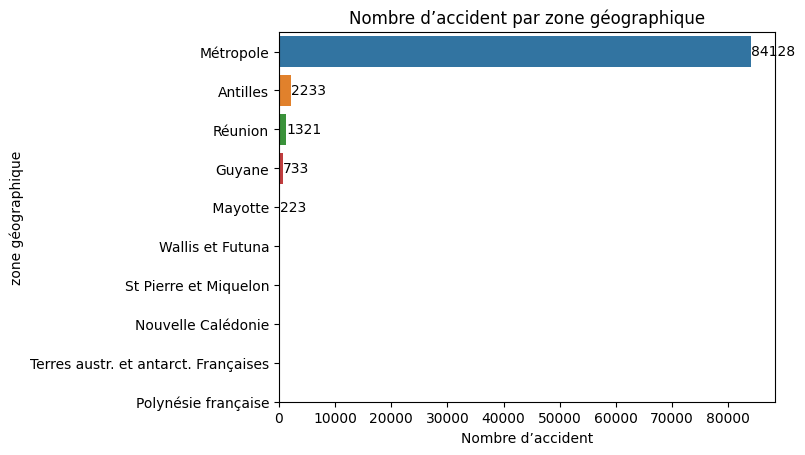

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import seaborn as sns

ax = sns.countplot(data=df, y='gps', order=df['gps'].value_counts(ascending=False).index)
plt.yticks(np.arange(10), ["Métropole","Antilles", "Réunion", "Guyane", " Mayotte", "Wallis et Futuna", "St Pierre et Miquelon", "Nouvelle Calédonie", "Terres austr. et antarct. Françaises", "Polynésie française"])
plt.title('Nombre d’accident par zone géographique')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('zone géographique')
plt.xlabel('Nombre d’accident')
#plt.xlim(0, 100000)
plt.show()

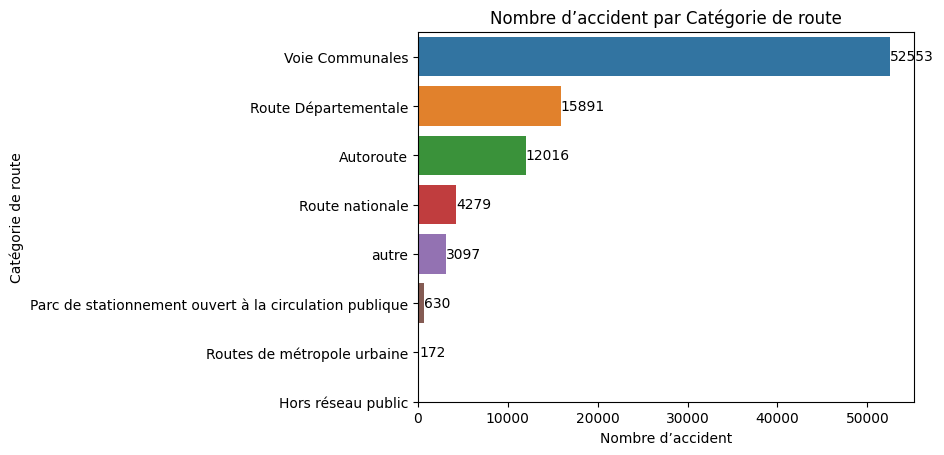

In [ ]:
ax = sns.countplot(data=df, y='catr', order=df['catr'].value_counts(ascending=False).index)
plt.yticks(np.arange(8), ["Voie Communales","Route Départementale", "Autoroute", "Route nationale", "autre", "Parc de stationnement ouvert à la circulation publique",
                          "Routes de métropole urbaine", "Hors réseau public"])
plt.title('Nombre d’accident par Catégorie de route')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Catégorie de route')
plt.xlabel('Nombre d’accident')
#plt.xlim(0, 100000)
plt.show()

In [ ]:
#Catégorie_de_route.plot(kind='barh',xlabel='Nombre d’accident',ylabel='Catégorie de route', title='Nombre d’accident en fonction de la Catégorie de route',color='#55cddd');

In [ ]:
df.grav.value_counts()


1.0    35479
3.0    32805
4.0    16197
2.0     4157
Name: grav, dtype: int64

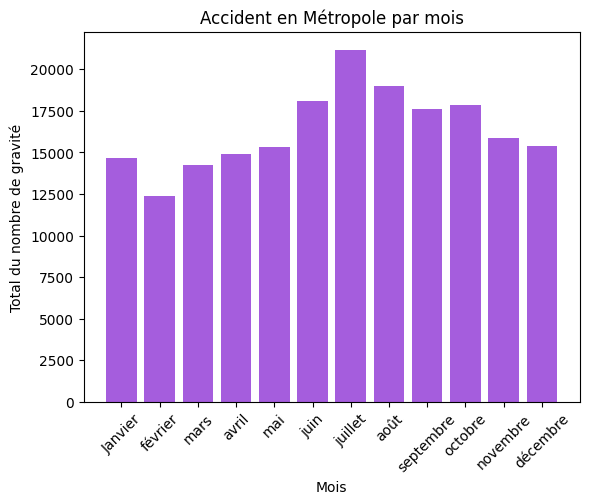

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import seaborn as sns
#Nous constatons qu'il y'a plus d'accident en métropole (M)
# visualiser en fonction du mois
M_accident = df[df.gps == 'M']
# Group the data by months and calculate the total severity number
grouped_M_accident = M_accident.groupby(M_accident['mois']).agg({'grav':'sum'})
# Convert the index column (months) to a list
Mois = grouped_M_accident.index.tolist()

# Get the severity values as a separate array
grav_values = grouped_M_accident['grav']
# Plot the bar chart
plt.bar(Mois, grav_values,color='#a55ddd')
plt.xlabel('Mois')
plt.ylabel('Total du nombre de gravité')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["Janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"], rotation=45)
plt.xticks(Mois)
plt.title('Accident en Métropole par mois')
plt.show()

In [ ]:
# conditions d’éclairage dans lesquelles l'accident s'est produit.
df.lum.value_counts()

1.0    60199
5.0    12875
3.0     9289
2.0     5610
4.0      665
Name: lum, dtype: int64

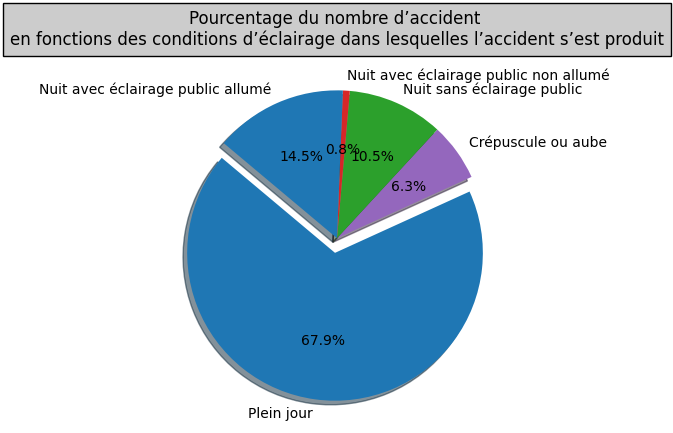

In [ ]:
Plein_jour = len(df[df.lum == 1])
Crépuscule_aube = len(df[df.lum == 2])
Nuit_sans_éclairage_public = len(df[df.lum == 3])
Nuit_avec_éclairage_public_non_allumé  = len(df[df.lum == 4])
Nuit_avec_éclairage_public_allumé  = len(df[df.lum == 5])
valuer_a = len(df[df.lum == -1])
#values=[Plein_jour,Crépuscule_aube,Nuit_sans_éclairage_public,Nuit_avec_éclairage_public_non_allumé, Nuit_avec_éclairage_public_allumé, valuer_a]
values=[Plein_jour,Crépuscule_aube,Nuit_sans_éclairage_public,Nuit_avec_éclairage_public_non_allumé, Nuit_avec_éclairage_public_allumé]
labels=["Plein jour","Crépuscule ou aube","Nuit sans éclairage public","Nuit avec éclairage public non allumé","Nuit avec éclairage public allumé"]
#labels=[1,2,3,4,5,-1]
#colors = ['#ff9999', '#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#66b3ff']
#colors = ['#ff9999', '#66b3ff', '#ff9999', '#99ff99', '#ffcc99', "#9467bd", "#8c564b"]
colors = ["#1f77b4", "#9467bd", "#2ca02c", "#d62728"]
plt.pie(values,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0),shadow=True,colors=colors, startangle=140)
plt.title("Pourcentage du nombre d’accident \n" + "en fonctions des conditions d’éclairage dans lesquelles l’accident s’est produit", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

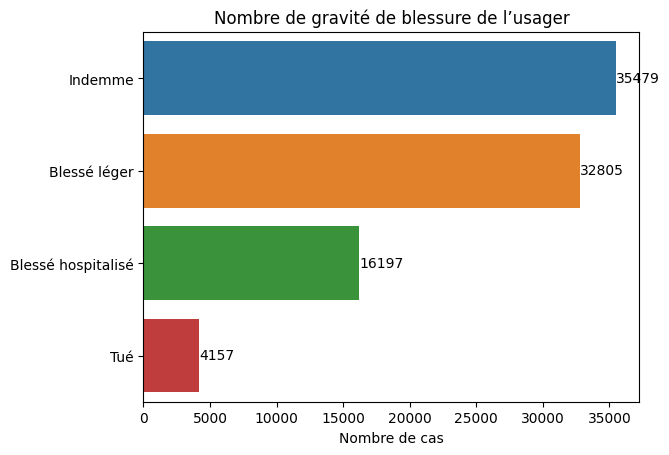

In [ ]:
#plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, y="grav", order=df['grav'].value_counts(ascending=False).index)
plt.yticks(np.arange(4), ["Indemme","Blessé léger", "Blessé hospitalisé", "Tué"])
#plt.yscale("log")
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('')
plt.xlabel('Nombre de cas')
plt.title("Nombre de gravité de blessure de l’usager") #,fontsize=20
plt.show()

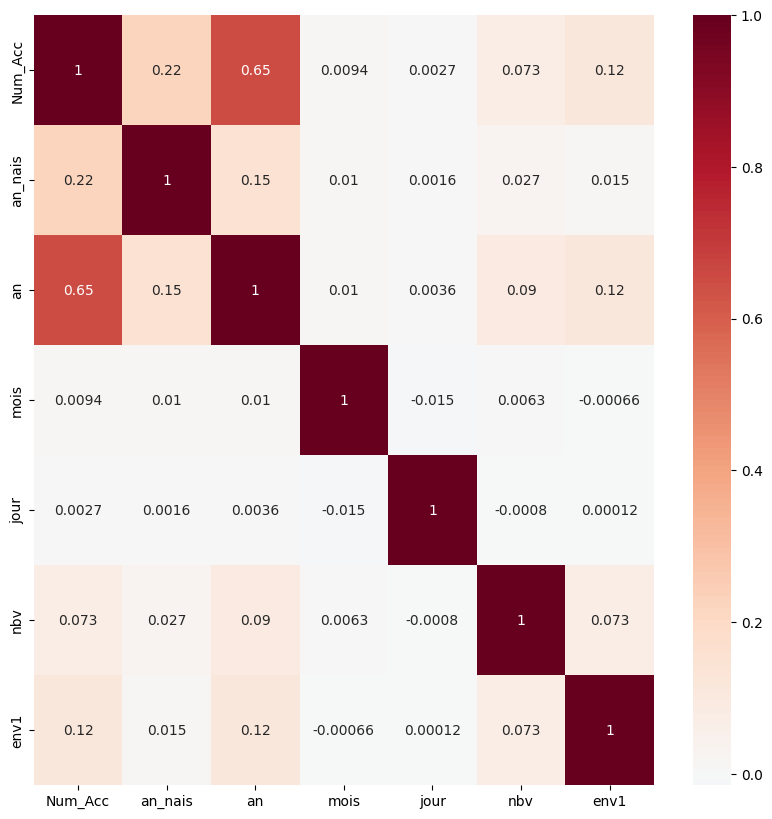

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.heatmap(VN_df.corr(), annot=True, cmap="RdBu_r", center=0);

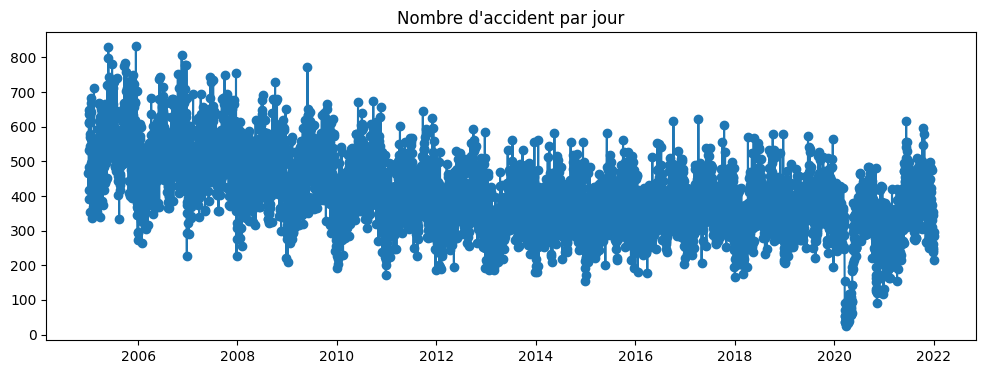

In [ ]:
# Dans une nouvelle colonne 'date', stocker la date à laquelle a eu lieu chaque accident
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df['date'] = df['an'].astype(str) + '-' + df['mois'].astype(str) + '-' + df['jour'].astype(str)
df['date'] = pd.to_datetime(df['date'], yearfirst = True)

values = df['date'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Nombre d'accident par jour");

In [ ]:
df.date.value_counts()

2006-07-01    176
2006-11-21    169
2006-07-23    169
2006-07-08    166
2006-06-11    165
             ... 
2016-11-26      1
2013-09-29      1
2016-06-26      1
2009-10-28      1
2009-11-02      1
Name: date, Length: 2257, dtype: int64

In [ ]:
#atm          Conditions atmosphériques
df.atm.value_counts()

1.0    2022852
2.0     260845
8.0      84813
3.0      55297
7.0      29309
5.0      17602
9.0      16999
4.0      15837
6.0       5991
Name: atm, dtype: int64

In [ ]:
df[["atm","grav"]].value_counts().sort_values()[-10:]

In [ ]:
df.grav.value_counts()

1.0    35479
3.0    32805
4.0    16197
2.0     4157
Name: grav, dtype: int64

In [ ]:
# Recode Variable
grav_mapping = {1:'Indemme'
                    ,2:'Tué'
                    ,3:'Blessé hospitalisé'
                    ,4:'Blessé léger'
                    }
df = df.assign(grav_temp  = df.grav.map(grav_mapping))
atm_mapping = {1:'Non renseigné'
                    ,2:'Normale'
                    ,3:'Pluie - légère'
                    ,4:'Neige - grêle'
                    ,5:'Brouillard - fumée'
                    ,6:'Vent fort - tempete'
                    ,7:'Temps éblouissant'
                    ,8:'Temps couvert'
                    ,9:'Autre'
                    }
df = df.assign(atm_temp  = df.atm.map(atm_mapping))
df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,...,plan,lartpc,larrout,surf,infra,situ,env1,date,grav_temp,atm_temp
0,200500000001,1.0,1,4.0,1.0,1.0,11.0,0.0,0,0.0,...,1.0,0,63,1.0,0.0,1.0,0.0,2005-01-12,Blessé léger,Non renseigné
1,200500000001,1.0,1,3.0,2.0,3.0,11.0,0.0,0,0.0,...,1.0,0,63,1.0,0.0,1.0,0.0,2005-01-12,Blessé hospitalisé,Non renseigné
2,200500000001,2.0,2,1.0,1.0,0.0,11.0,0.0,0,0.0,...,1.0,0,63,1.0,0.0,1.0,0.0,2005-01-12,Indemme,Non renseigné
3,200500000001,4.0,2,1.0,1.0,0.0,31.0,0.0,0,0.0,...,1.0,0,63,1.0,0.0,1.0,0.0,2005-01-12,Indemme,Non renseigné
4,200500000001,5.0,2,1.0,1.0,0.0,11.0,0.0,0,0.0,...,1.0,0,63,1.0,0.0,1.0,0.0,2005-01-12,Indemme,Non renseigné


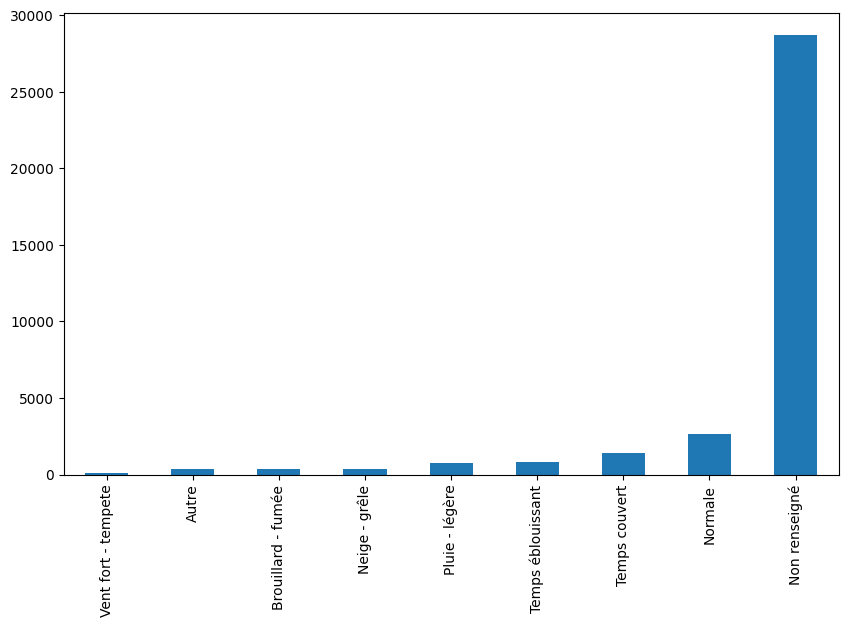

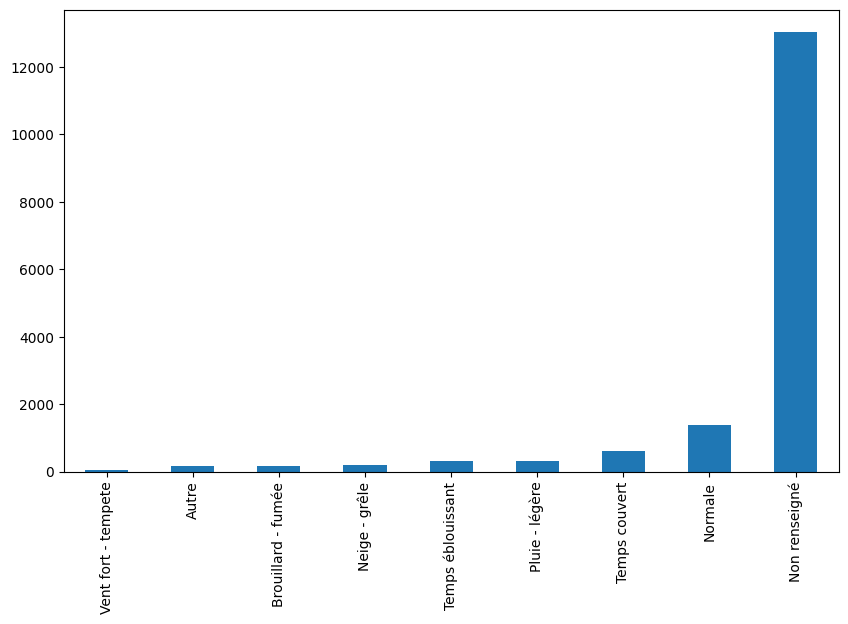

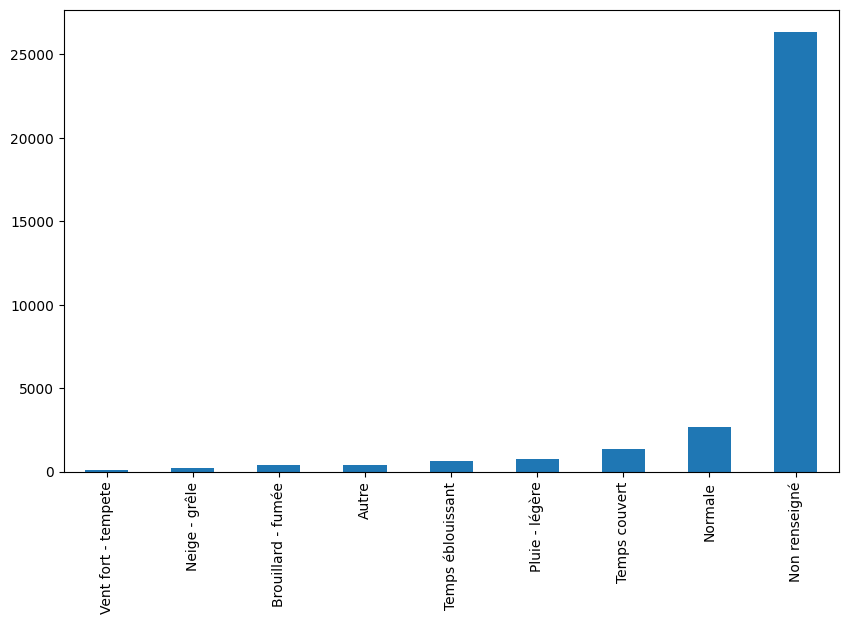

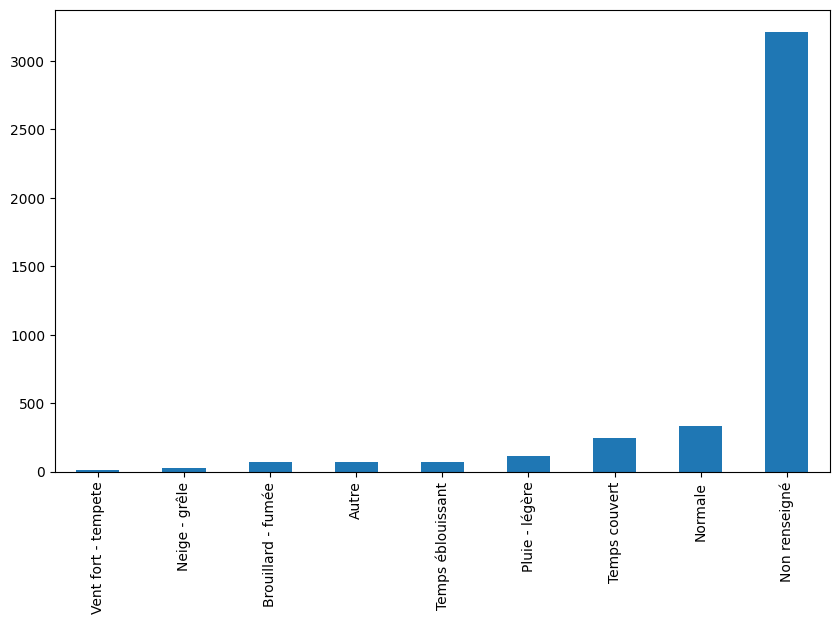

In [ ]:

# Recode Variable
grav_mapping = {1:'Indemme'
                    ,2:'Tué'
                    ,3:'Blessé hospitalisé'
                    ,4:'Blessé léger'
                    }
df = df.assign(grav_temp  = df.grav.map(grav_mapping))
atm_mapping = {1:'Non renseigné'
                    ,2:'Normale'
                    ,3:'Pluie - légère'
                    ,4:'Neige - grêle'
                    ,5:'Brouillard - fumée'
                    ,6:'Vent fort - tempete'
                    ,7:'Temps éblouissant'
                    ,8:'Temps couvert'
                    ,9:'Autre'
                    }
df = df.assign(atm_temp  = df.atm.map(atm_mapping))
df.head()
#atm
#Conditions atmosphériques

#plt.yticks(np.arange(4), ["Indemme","Blessé léger", "Blessé hospitalisé", "Tué"])
cat_grav = ["Indemme","Blessé léger", "Blessé hospitalisé", "Tué"]
for x in cat_grav:
    plt.subplots(figsize=(10,6))
    df.loc[df["grav_temp"] == x]['atm_temp'].value_counts().sort_values().plot(kind="bar")

In [ ]:
df.atm_temp.value_counts()

Non renseigné          71338
Normale                 7003
Temps couvert           3610
Pluie - légère          1950
Temps éblouissant       1859
Autre                    973
Brouillard - fumée       935
Neige - grêle            757
Vent fort - tempete      213
Name: atm_temp, dtype: int64

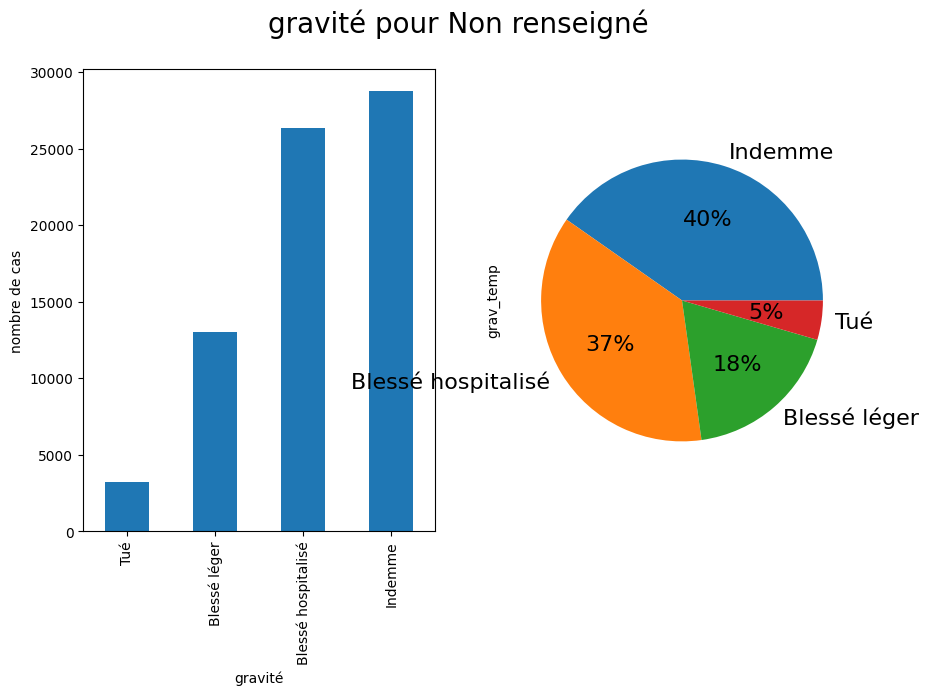

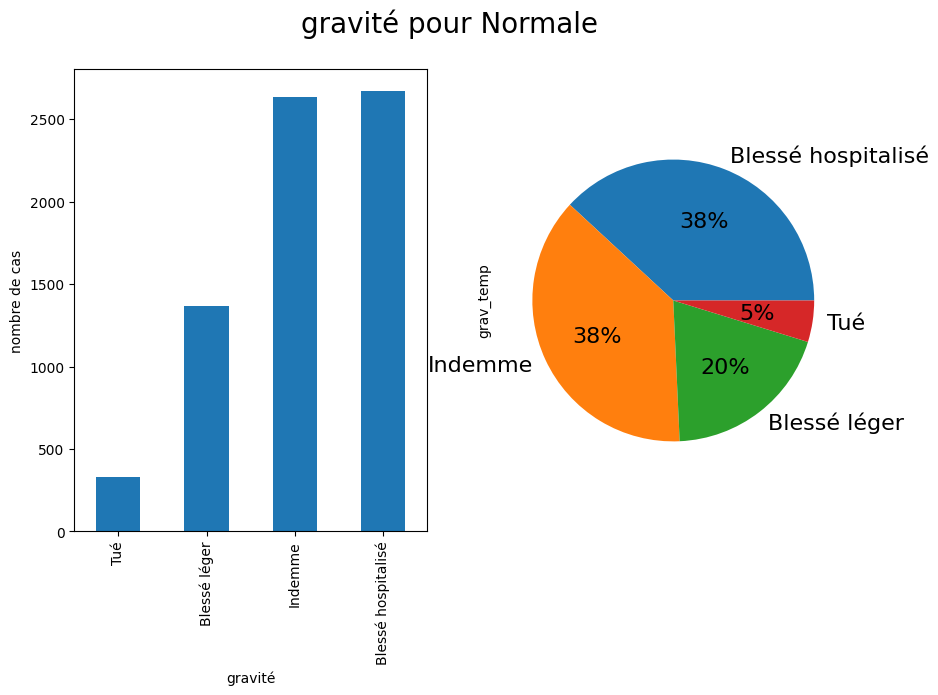

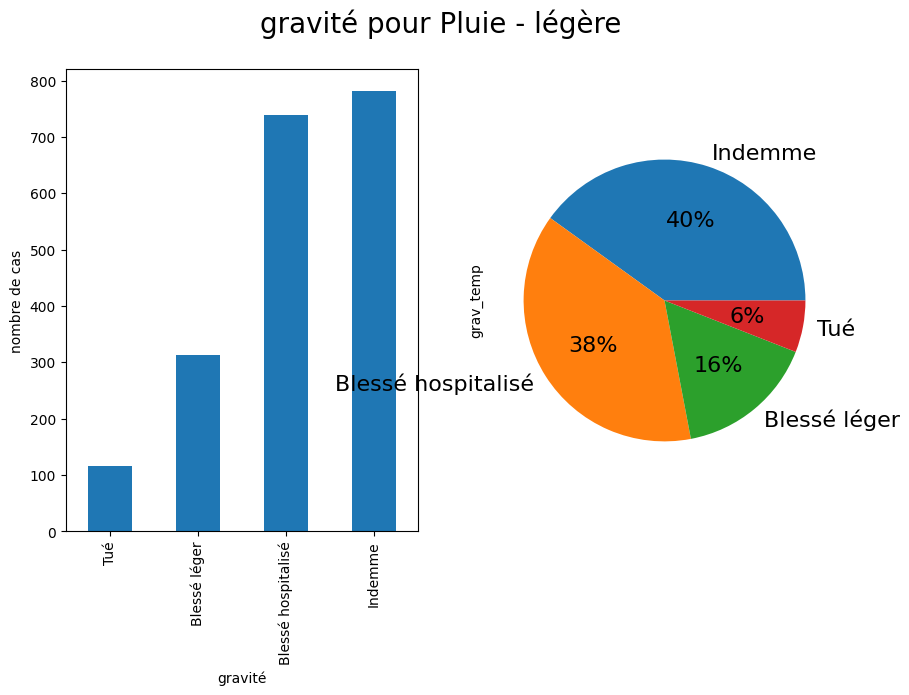

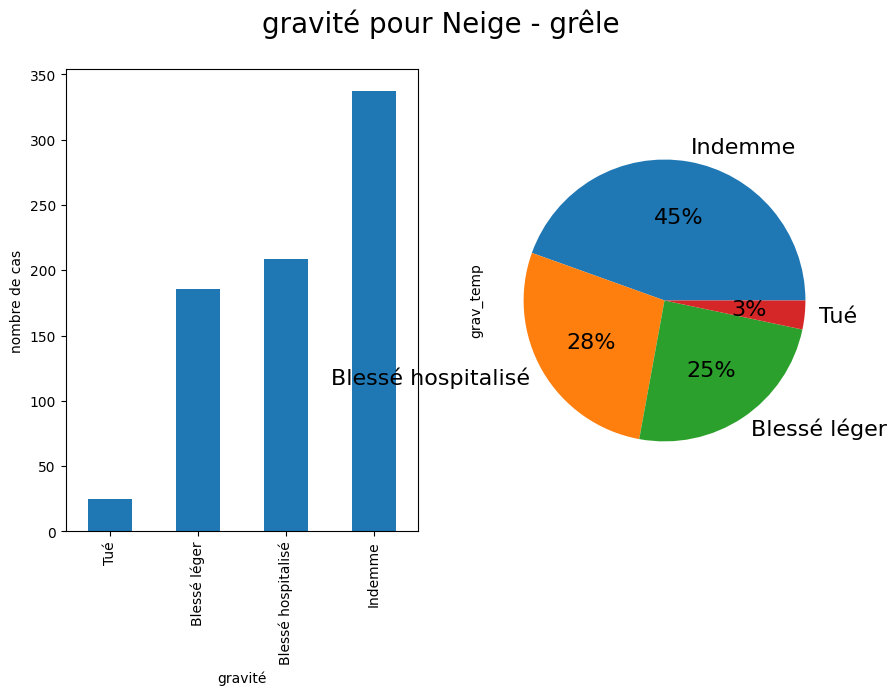

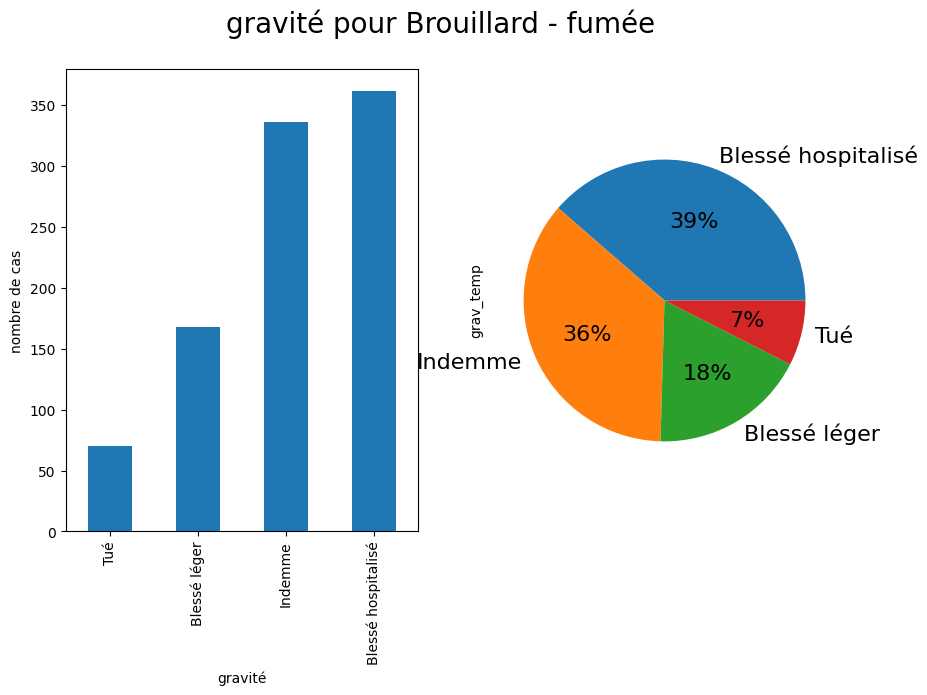

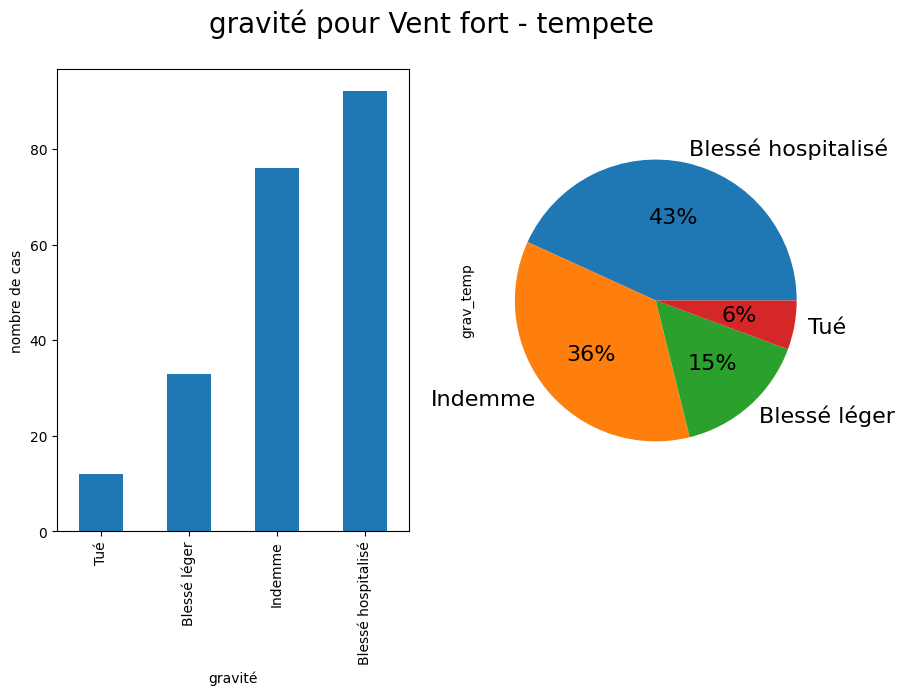

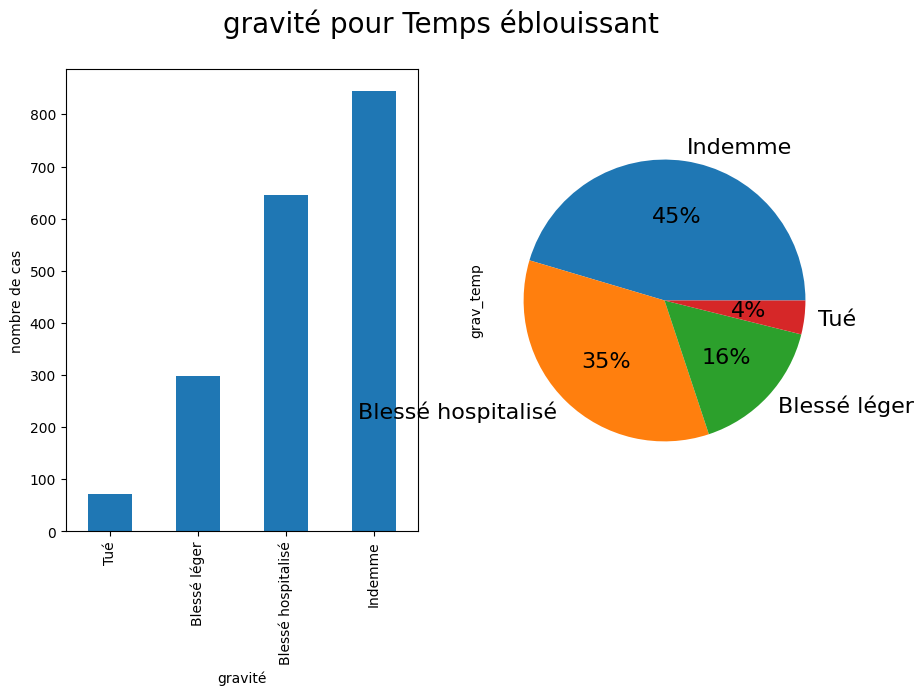

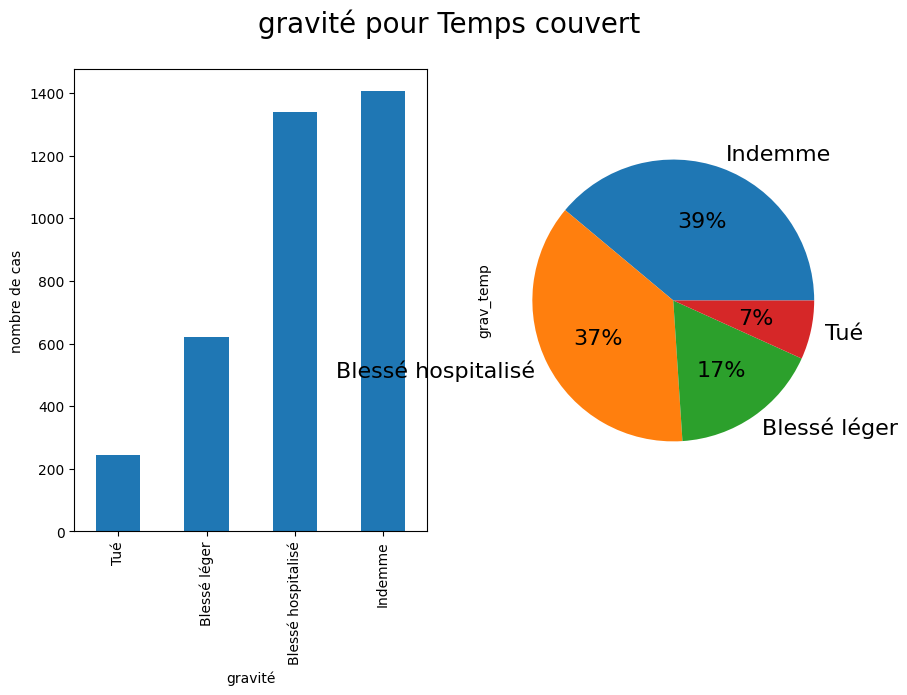

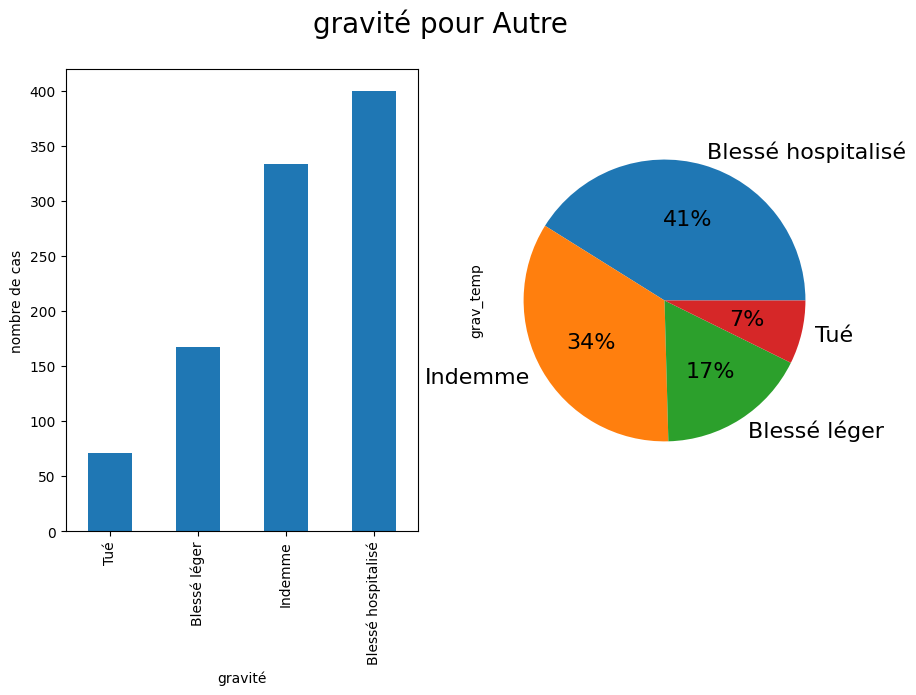

In [ ]:
# values=["Fog","Light Rain","Rain","Heavy Rain","Snow"]
values = ["Non renseigné", "Normale", "Pluie - légère", "Neige - grêle", "Brouillard - fumée", "Vent fort - tempete", "Temps éblouissant", "Temps couvert", "Autre"]
for x in values:
    plt.subplots(1,2,figsize=(10,6))
    plt.subplot(1,2,1)
    df.loc[df["atm_temp"]==x]["grav_temp"].value_counts().sort_values().plot(kind="bar")
    plt.suptitle("gravité pour "+str(x),fontsize=20)
    plt.xlabel("gravité")
    plt.ylabel("nombre de cas")
    plt.subplot(1,2,2)
    df.loc[df["atm_temp"] == x]['grav_temp'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

In [ ]:
df =df.drop(["atm_temp", "grav_temp", "date"], axis=1)

In [ ]:
newdf = df.copy()

In [ ]:
df.dtypes.value_counts()

object     43
int64       4
float64     3
dtype: int64

In [ ]:
var_inutile = ['Num_Acc', 'an_nais', 'num_veh', 'lartpc', 'larrout', 'nbv', 'voie', 'adr', 'lat', 'long'] # 'nbv'= nombre total de voies de circulation

# Dichotomiser les vatriables categorielles
# drop variable numérique
#VC_hp =hp.drop(VN_name)
#VC_name = VC_hp.columns
import pandas as pd
#Methode 1
X = df.drop(["grav", 'Num_Acc', 'an_nais', 'num_veh', 'lartpc', 'larrout', 'nbv', 'voie', 'adr', 'lat', 'long'], axis=1)
y = df["grav"]
#df = pd.get_dummies(data= df, columns= VC_name)




In [ ]:
encoded_df = pd.get_dummies(X, drop_first=True) #, sparse=True
encoded_df.shape

<ipython-input-29-31d5a50b6f4b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(X, drop_first=True) #, sparse=True
<ipython-input-29-31d5a50b6f4b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(X, drop_first=True) #, sparse=True
<ipython-input-29-31d5a50b6f4b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(X, drop_first=True) #, sparse=True
<ipython-input-29-31d5a50b6f4b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(X, drop_first=True) #, sparse=True


(88638, 3556)

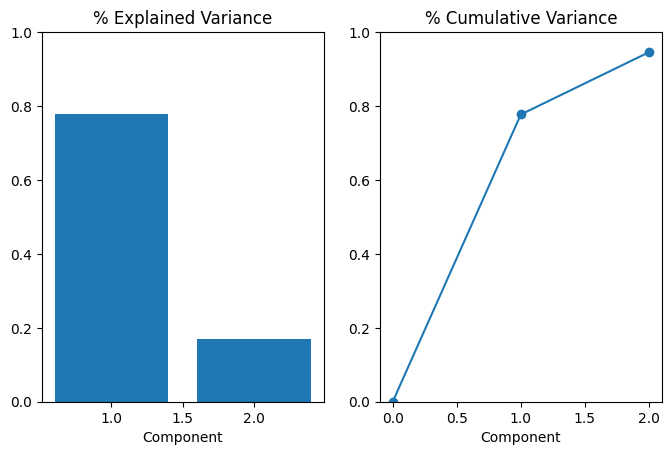

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

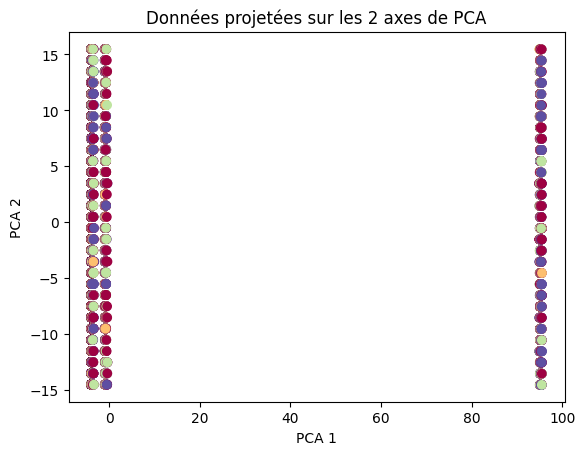

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#encoded_df_pca = pca.fit_transform(encoded_df)
#pca.explained_variance_
#That's not much... Let's get a visualization of how our claim descriptions are scattered based on the first 2 explainability #axes.
#fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(encoded_df_pca[:, 0].get(), encoded_df_pca[:, 1].get(), c='r')
#ax.scatter(encoded_df_pca[:, 0], encoded_df_pca[:, 1], cmap=plt.cm.Spectral)
#ax.set_xlabel('PCA 1')
#ax.set_ylabel('PCA 2')
#plt.show()

pca = PCA(n_components = 2)
data_2D = pca.fit_transform(encoded_df)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:, 0], data_2D[:, 1], c = y, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

In [ ]:
pca = PCA()
pca.fit(encoded_df)

plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,100)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

NameError: ignored

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)